In [1]:
import pandas as pd
import numpy as np


from datetime import datetime
import pymongo
from pymongo import MongoClient
import json


import seaborn as sns
import matplotlib.pyplot as plt


import sys 
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as f

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../datos/EF/Datos_alimentados/datos_ef_alimentados.csv", index_col=0)

In [3]:
#creo la base de datos y la colección

client = MongoClient("mongodb://localhost:27017/")
bd = client["Final_project"]
collection = bd["Housing_EF"]

In [4]:
# data = df.to_dict(orient="records")                             #Lo dejo comentado para que no se dupliquen los datos cada vez que corro todo
# collection.insert_many(data)                            #inserto los datos
# print("Datos insertados en MongoDB con éxito.")

# for registro in collection.find().limit(5):             #para comprobar que se haya insertado bien
#     print(registro)


In [5]:
df.head(1)

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,erfotov,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar
0,1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,63.480315,Junio,2021,Si,No,1,Propia por compra con pagos pendientes,De 200€ a menos de 300€,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,Si,No,Si,Si,No,No,Si,Si,Si,1,1,3,0,0,Entre 76 y 90 m2,1,Si,Si,Si,Si,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.500€ a menos de 2.000€,Multifamiliar,Edificio con 10 o más viviendas,3,1,De 1991 a 2000,moderadamente bueno,No es accesible,No,Si,De 101 a 150,No,No,Si,Alcantarillado,No,4,convencional,no tiene renovable,Sin internet,País Vasco,6200,IBI,2147,4.2


In [6]:
columnas_a_traer = {               #pongo 1 para incluirla y 0 para excluir 
    "iden":1,
    "ccaa": 1,
    "idq_pv": 1,
    "idq_mun": 1,
    "nresi":1,
    "regvi": 1,
    "pagovi": 1,  
    "naseos": 1,
    "ndormito": 1,
    "nsototrast":1,
    "notrashabit":1,
    "metrosvi": 1,
    "nsalones": 1,
    "ingrehog":1,
    "led":1,
    "nvehiculos": 1,
    "tipoagua":1,
    "tipoedif": 1,
    "nplantassob": 1,
    "nplantasbajo": 1,
    "annoedifinterv": 1,
    "estadoedif": 1,
    "ascensor": 1,
    "garaje": 1,
    "erfotov": 1,
    "vehiculos": 1,
    "nvehiculos":1,
    "renovables": 1,
    "ayudas_ccaa": 1,
    "bonificaciones": 1,
    "horas_de_sol": 1,
    "radiacion_solar": 1,
    "conectividad":1,
    "nviviendp":1,
    "_id": 0

}


datos_filtrados = list(collection.find({}, columnas_a_traer))    #filtro las columnas que pienso que tienen sentido para predecir las EF
df_filtrado = pd.DataFrame(datos_filtrados)


In [7]:
df_filtrado.head()

,iden,idq_pv,idq_mun,nresi,regvi,pagovi,tipoagua,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,led,ingrehog,tipoedif,nplantassob,nplantasbajo,annoedifinterv,estadoedif,ascensor,garaje,erfotov,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar
0,1,Álava,Municipio_pequeño,1,Propia por compra con pagos pendientes,De 200€ a menos de 300€,abastecimiento público,1,1,3,0,0,Entre 76 y 90 m2,1,Si,De 1.500€ a menos de 2.000€,Multifamiliar,3,1,De 1991 a 2000,moderadamente bueno,No,Si,No,4,convencional,no tiene renovable,Sin internet,País Vasco,6200,IBI,2147,4.2
1,2,Álava,Municipio_pequeño,2,Propia por compra totalmente pagada,Desconocido,abastecimiento público,3,1,3,2,0,Entre 121 y 150 m2,1,Si,De 1.000€ a menos de 1.500€,Unifamiliar,2,1,De 1991 a 2000,casi perfecto,No,Si,No,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2
2,3,Álava,Municipio_pequeño,4,Propia por compra con pagos pendientes,De 700€ a menos de 800€,abastecimiento público,4,1,4,2,0,Entre 106 y 120 m2,3,Si,De 2.500€ a menos de 3.000€,Unifamiliar,2,1,De 2001 a 2010,casi perfecto,No,Si,No,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2
3,4,Álava,Municipio_pequeño,1,Propia por herencia o donación,Desconocido,abastecimiento público,1,2,3,0,0,Entre 61 y 75 m2,1,No,De 2.000€ a menos de 2.500€,Multifamiliar,3,0,De 1951 a 1960,bueno,No,No,No,2,convencional,no tiene renovable,banda ancha fija,País Vasco,6200,IBI,2147,4.2
4,5,Álava,Municipio_pequeño,4,Propia por compra totalmente pagada,Desconocido,abastecimiento público,3,1,3,1,0,Entre 91 y 105 m2,2,Si,De 3.000€ a menos de 5.000€,Unifamiliar,3,1,De 2001 a 2010,casi perfecto,No,Si,No,1,convencional,no tiene renovable,banda ancha movil,País Vasco,4800,IBI,2147,4.2


PASO ERFOTOV A NUMÉRICA PARA PODER SACAR SUS CORRELACIONES CON EL RESTO

In [8]:
dicc={"Si":1,
      "No":0}
df_filtrado["erfotov"]=df_filtrado["erfotov"].map(dicc)

HACEMOS EDA

# EDA

In [9]:

f.exploracion_dataframe(df_filtrado,"erfotov")

El número de datos es 172444 y el de columnas es 33

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
iden,int64
idq_pv,object
idq_mun,object
nresi,int64
regvi,object
pagovi,object
tipoagua,object
naseos,int64
nsalones,int64
ndormito,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 52 categorías (5/52)


,count
idq_pv,
Madrid,18013
Barcelona,14346
Santa Cruz de Tenerife,6811
Valencia,6342
Las Palmas de Gran Canaria,5875


La columna IDQ_MUN tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 152 categorías (5/152)


,count
idq_mun,
Municipio_pequeño,67340
Madrid,2374
Zaragoza,2139
Logroño,2019
Melilla,1599


La columna REGVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


,count
regvi,
Propia por compra totalmente pagada,71840
Propia por compra con pagos pendientes,45369
Alquilada,21050
Propia por herencia o donación,19844
Otra forma,10126


La columna PAGOVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


,count
pagovi,
Desconocido,106025
De 300€ a menos de 400€,14471
De 400€ a menos de 500€,13159
De 500€ a menos de 600€,9364
De 200€ a menos de 300€,8652


La columna TIPOAGUA tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
tipoagua,
abastecimiento público,162679
abastecimiento privado,9517
No tiene agua corriente,248


La columna METROSVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10 categorías (5/10)


,count
metrosvi,
Entre 76 y 90 m2,45373
Entre 91 y 105 m2,29035
Entre 61 y 75 m2,28628
Entre 106 y 120 m2,18519
Entre 121 y 150 m2,14140


La columna LED tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
led,
Si,126094
No,46350


La columna INGREHOG tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


,count
ingrehog,
De 1.000€ a menos de 1.500€,39619
De 500€ a menos de 1.000€,32406
De 1.500€ a menos de 2.000€,29683
De 2.000€ a menos de 2.500€,22462
De 3.000€ a menos de 5.000€,18925


La columna TIPOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
tipoedif,
Multifamiliar,111780
Unifamiliar,60664


La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


,count
annoedifinterv,
De 2001 a 2010,31598
De 1971 a 1980,30490
De 1991 a 2000,29667
De 1981 a 1990,23650
De 1961 a 1970,20684


La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


,count
estadoedif,
muy bueno,53989
bueno,35346
casi perfecto,28639
perfecto,22091
moderadamente bueno,16224


La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
ascensor,
No,91118
Si,81326


La columna GARAJE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
garaje,
Si,93780
No,78664


La columna NVIVIENDP tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


,count
nviviendp,
1,71757
4,32339
2,31632
3,14809
De 5 a 9,14670


La columna VEHICULOS tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
vehiculos,
convencional,133304
No tiene vehiculo,33896
híbrido,4502
eléctrico,742


La columna RENOVABLES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
renovables,
no tiene renovable,162676
energía solar,6882
otra renovable,2886


La columna CONECTIVIDAD tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
conectividad,
banda ancha fija,113237
Sin internet,32052
banda ancha movil,17728
banda estrecha,9427


La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 19 categorías (5/19)


,count
ccaa,
Andalucía,25562
Cataluña,19934
Madrid,18013
Castilla y León,14666
Comunidad Valenciana,14499


La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
bonificaciones,
IBI y ICIO,94104
IBI,75195
Ninguna,3145



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
iden,172444.0,86222.500000,49780.439247,1.0,43111.75,86222.5,129333.25,172444.00
nresi,172444.0,2.461628,1.227745,1.0,2.00,2.0,3.00,20.00
naseos,172444.0,1.715357,0.737950,0.0,1.00,2.0,2.00,10.00
nsalones,172444.0,1.175982,0.460715,0.0,1.00,1.0,1.00,10.00
ndormito,172444.0,2.991058,0.915236,0.0,3.00,3.0,3.00,15.00
nsototrast,172444.0,0.379845,0.613164,0.0,0.00,0.0,1.00,10.00
notrashabit,172444.0,0.268435,0.646713,0.0,0.00,0.0,0.00,10.00
nvehiculos,172444.0,1.244021,0.910037,0.0,1.00,1.0,2.00,10.00
nplantassob,172444.0,3.678557,2.735649,0.0,2.00,3.0,5.00,50.00
nplantasbajo,172444.0,0.825839,1.260892,0.0,0.00,1.0,1.00,10.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
idq_pv,172444,52,Madrid,18013
idq_mun,172444,152,Municipio_pequeño,67340
regvi,172444,6,Propia por compra totalmente pagada,71840
pagovi,172444,17,Desconocido,106025
tipoagua,172444,3,abastecimiento público,162679
metrosvi,172444,10,Entre 76 y 90 m2,45373
led,172444,2,Si,126094
ingrehog,172444,9,De 1.000€ a menos de 1.500€,39619
tipoedif,172444,2,Multifamiliar,111780
annoedifinterv,172444,11,De 2001 a 2010,31598



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172444 entries, 0 to 172443
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iden             172444 non-null  int64  
 1   idq_pv           172444 non-null  object 
 2   idq_mun          172444 non-null  object 
 3   nresi            172444 non-null  int64  
 4   regvi            172444 non-null  object 
 5   pagovi           172444 non-null  object 
 6   tipoagua         172444 non-null  object 
 7   naseos           172444 non-null  int64  
 8   nsalones         172444 non-null  int64  
 9   ndormito         172444 non-null  int64  
 10  nsototrast       172444 non-null  int64  
 11  notrashabit      172444 non-null  int64  
 12  metrosvi         172444 non-null  object 
 13  nvehiculos       172444 non-null  int64  
 14  led              172444 non-null  object 
 15  ingrehog         1724

None

Lo que he podido ver hasta el momento es que parece haber outliers por arriba en número de habitaciones, baños, residencias, salones, vehículos etc que distorsionan moderadamente la media

In [10]:
df_filtrado["ndormito"].unique()

array([ 3,  4,  2,  1,  6, 11,  5,  7, 12,  0, 15,  8,  9, 10, 13, 14])

In [11]:
df_filtrado["nplantasbajo"].unique()

array([ 1,  0,  3,  2,  4,  8,  5,  6,  7,  9, 10])

VEO LA DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

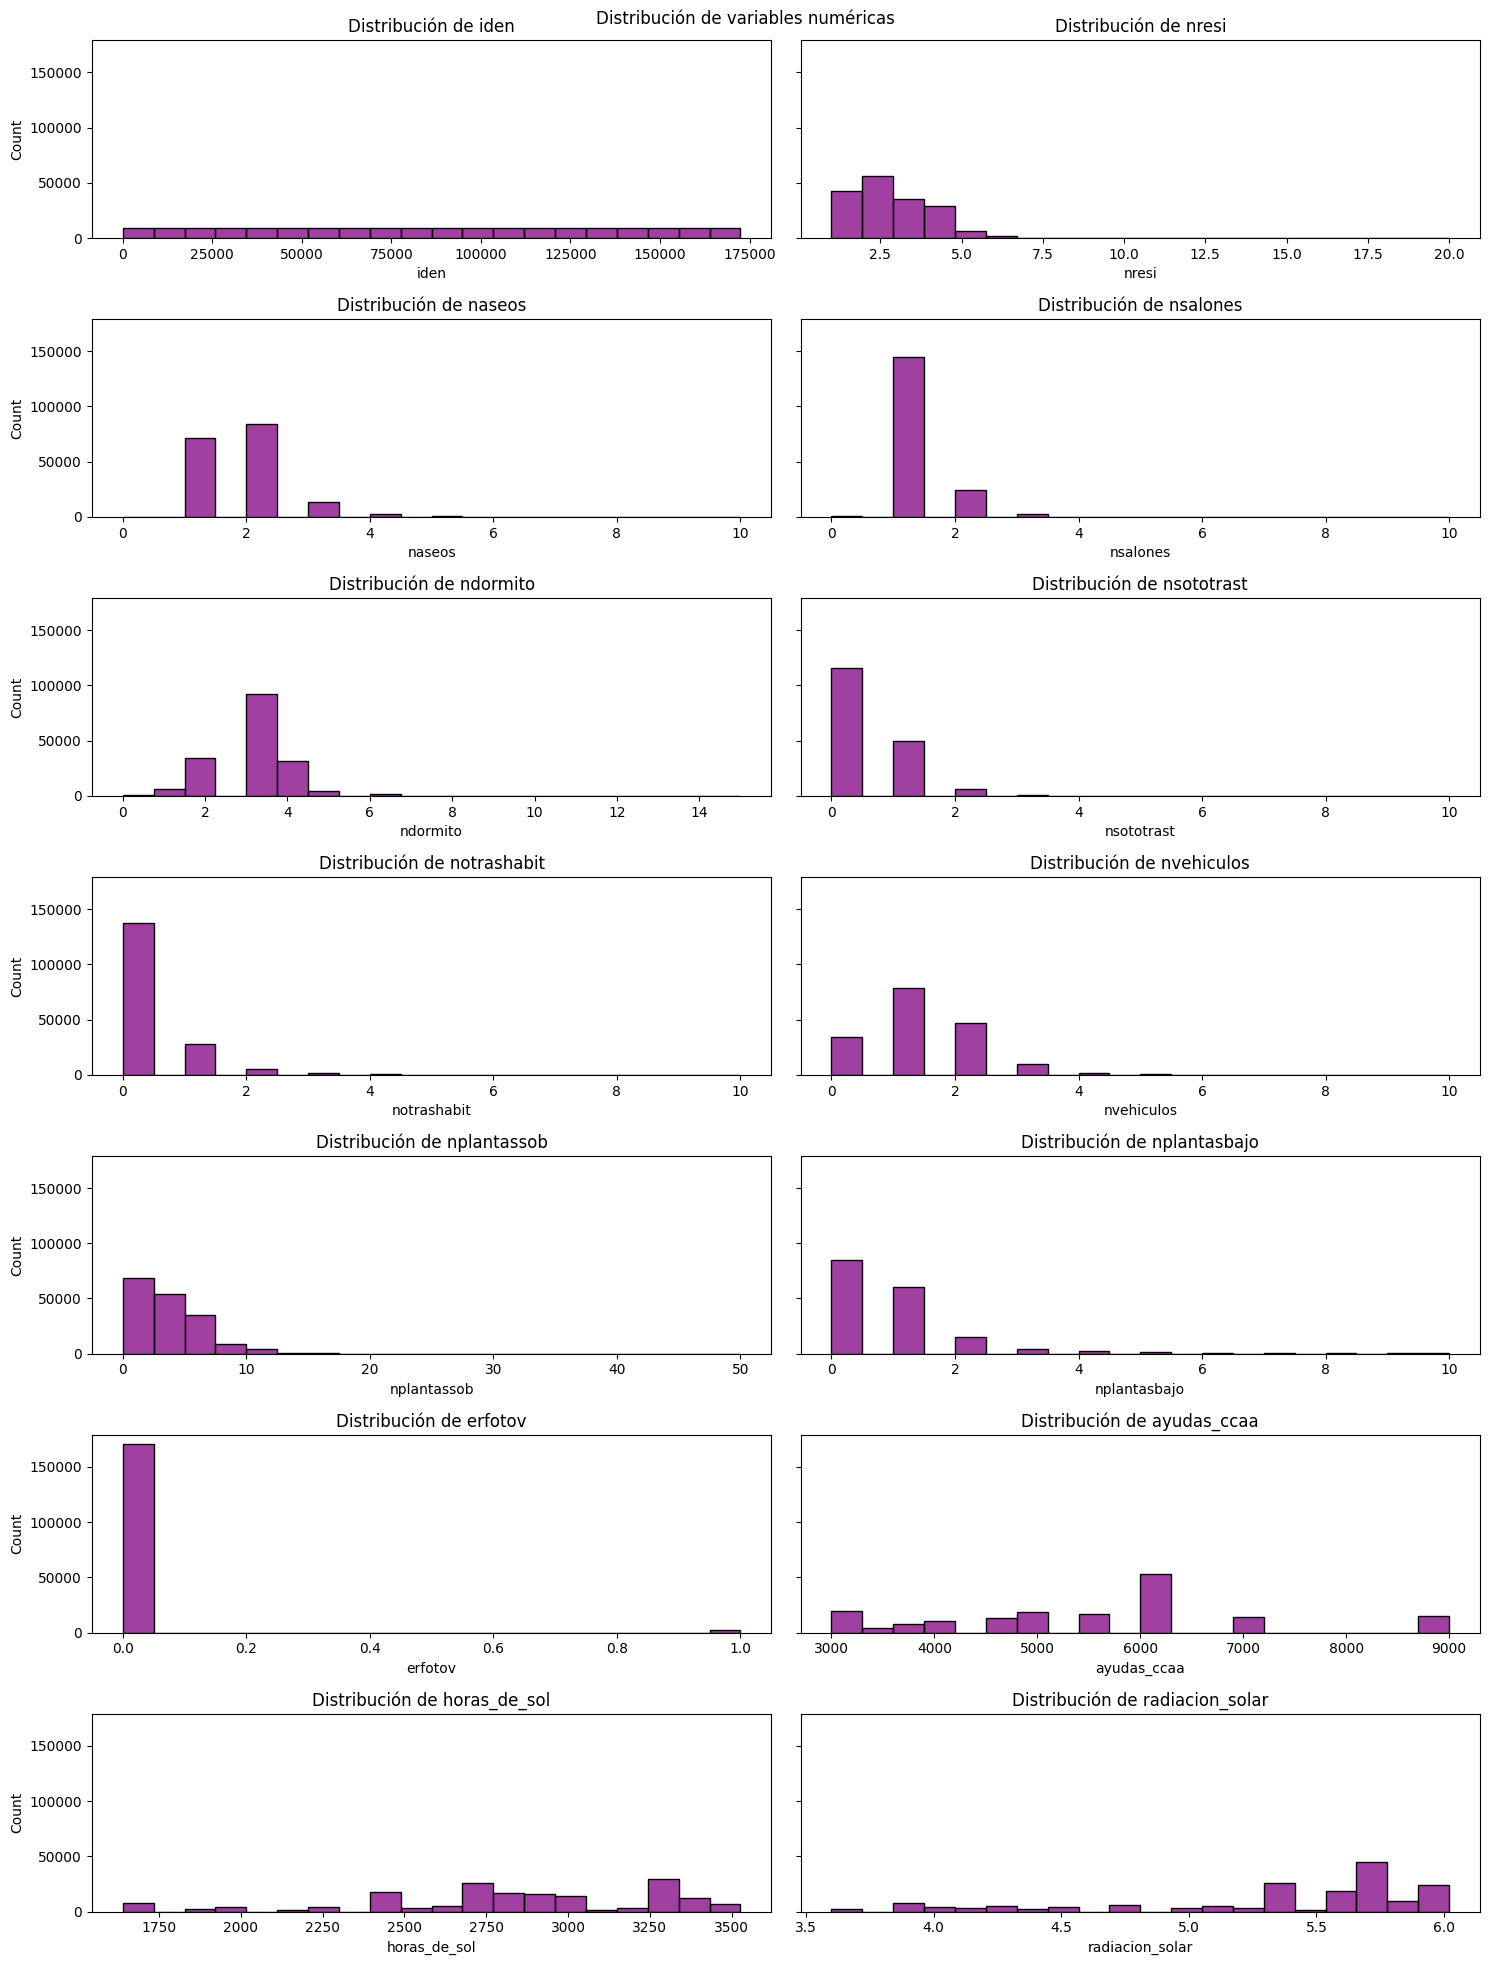

In [12]:
visualizador=f.Visualizador(df_filtrado)
visualizador.plot_numericas(color="purple", tamano_grafica=(15, 20))

VEO LA DISTRIBUCIÓN DE LAS VARIABLES CATEGÓRICAS

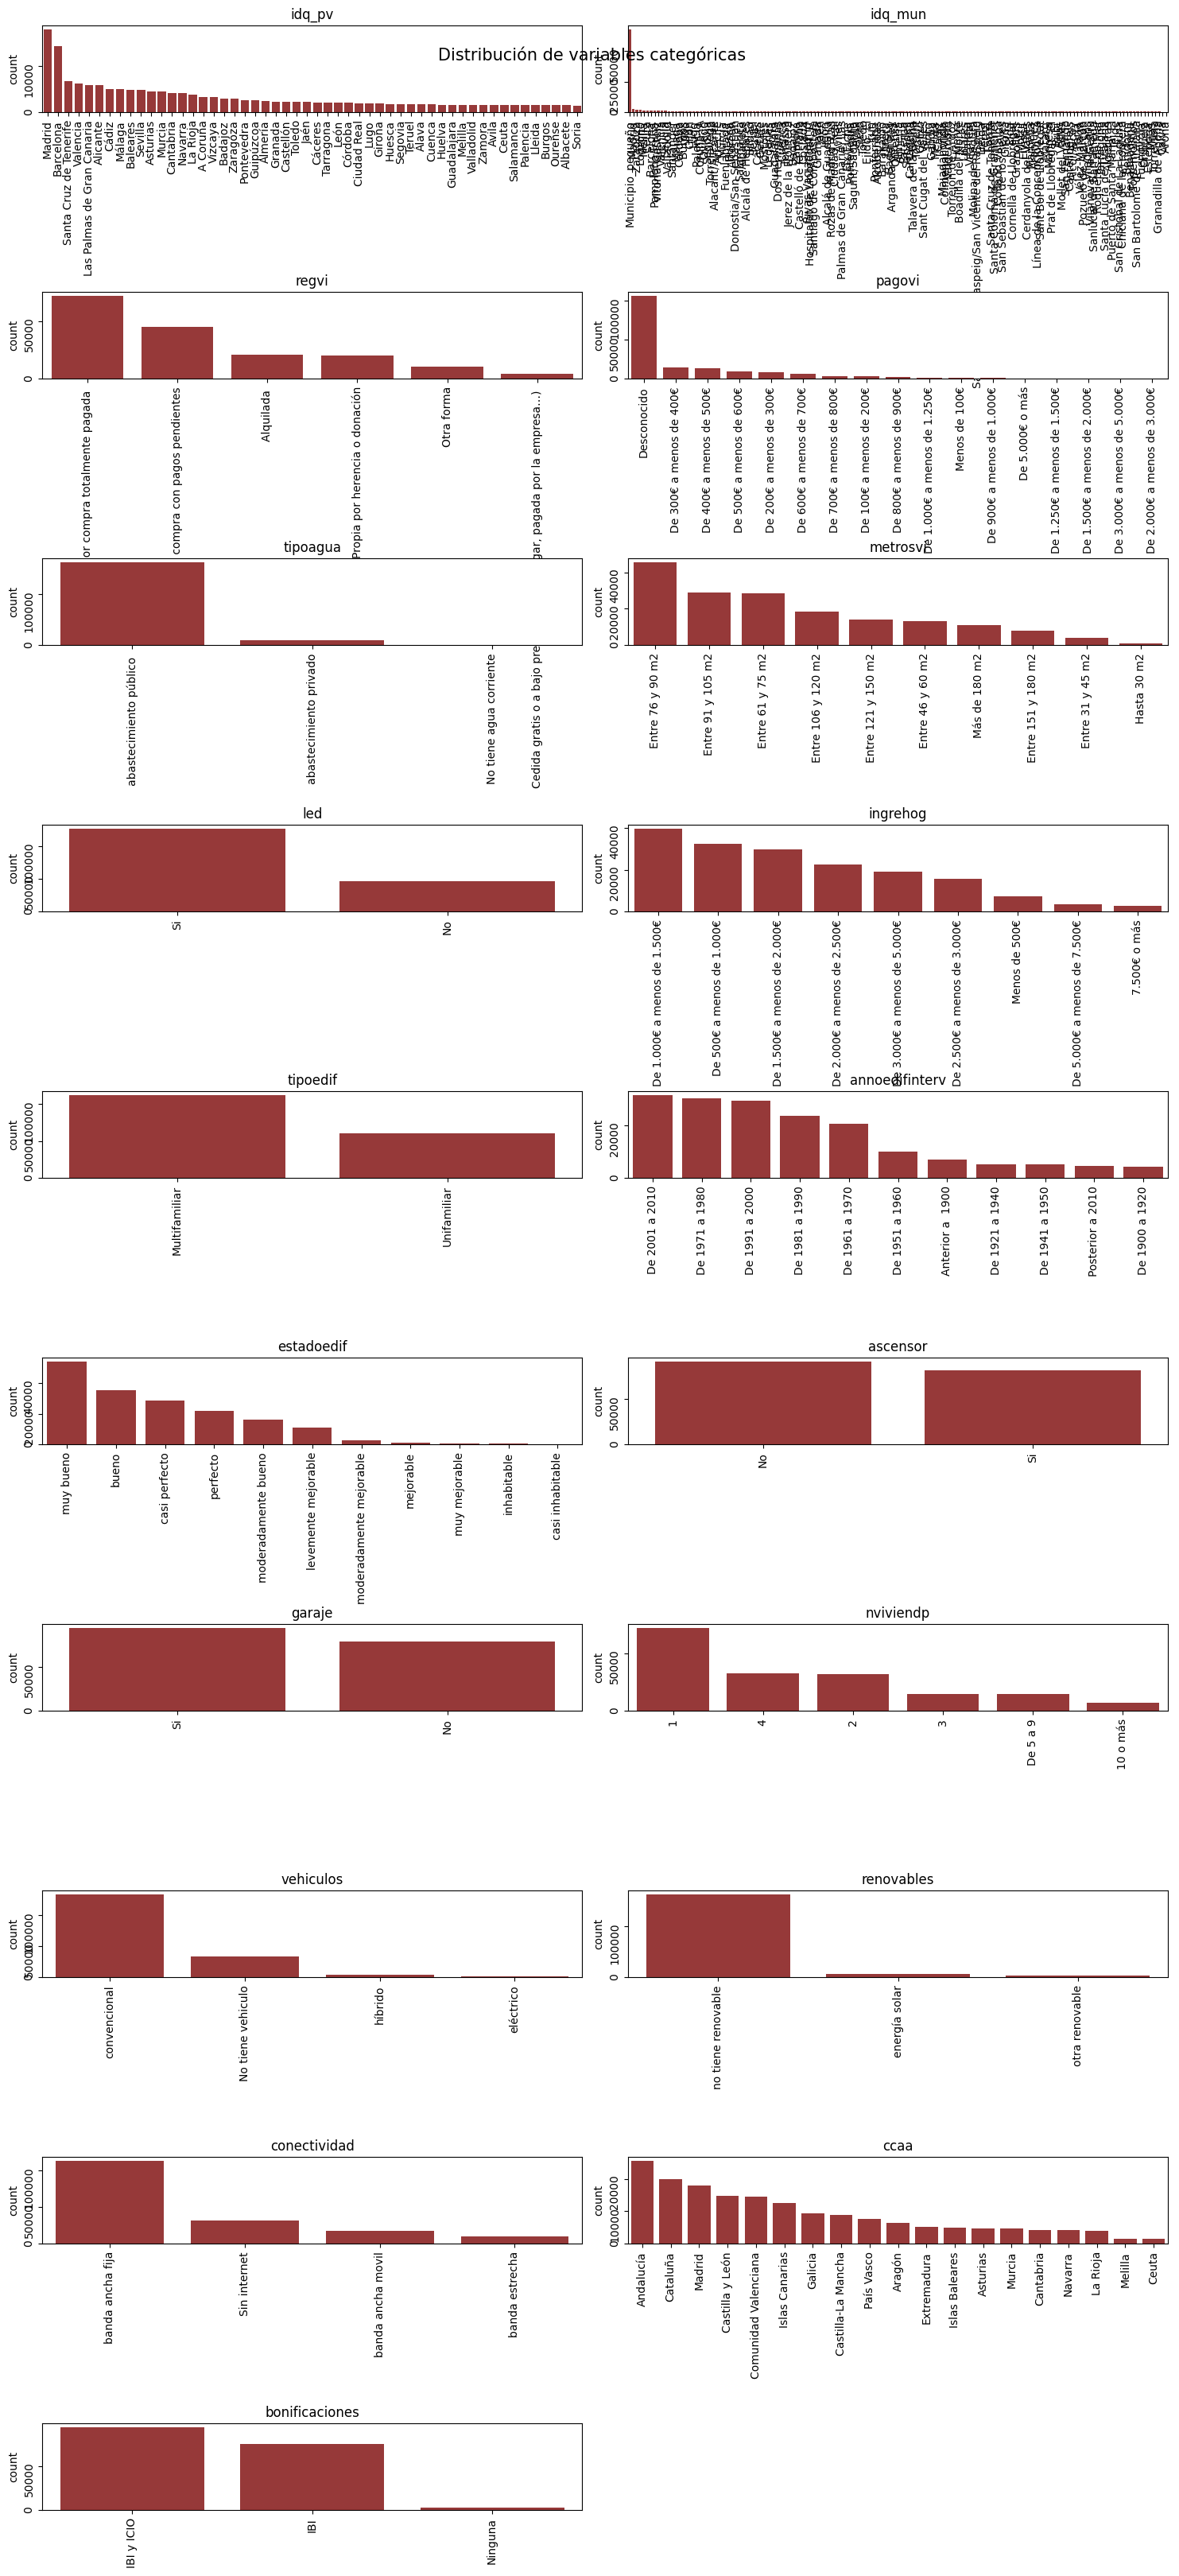

In [13]:
visualizador.plot_categoricas(color="brown",tamanio_grafica=(15,32), tamanio_fuente=10)

NO VEO LA RELACIÓN CON LA VARIABLE DEPENDIENTE PORQUE AL ESTAR TAN DESBALANCEADO NO ES BUENA OPCIÓN POR ELLO OBSERVO LA RELACION CON EF DE MANERA SEPARADA

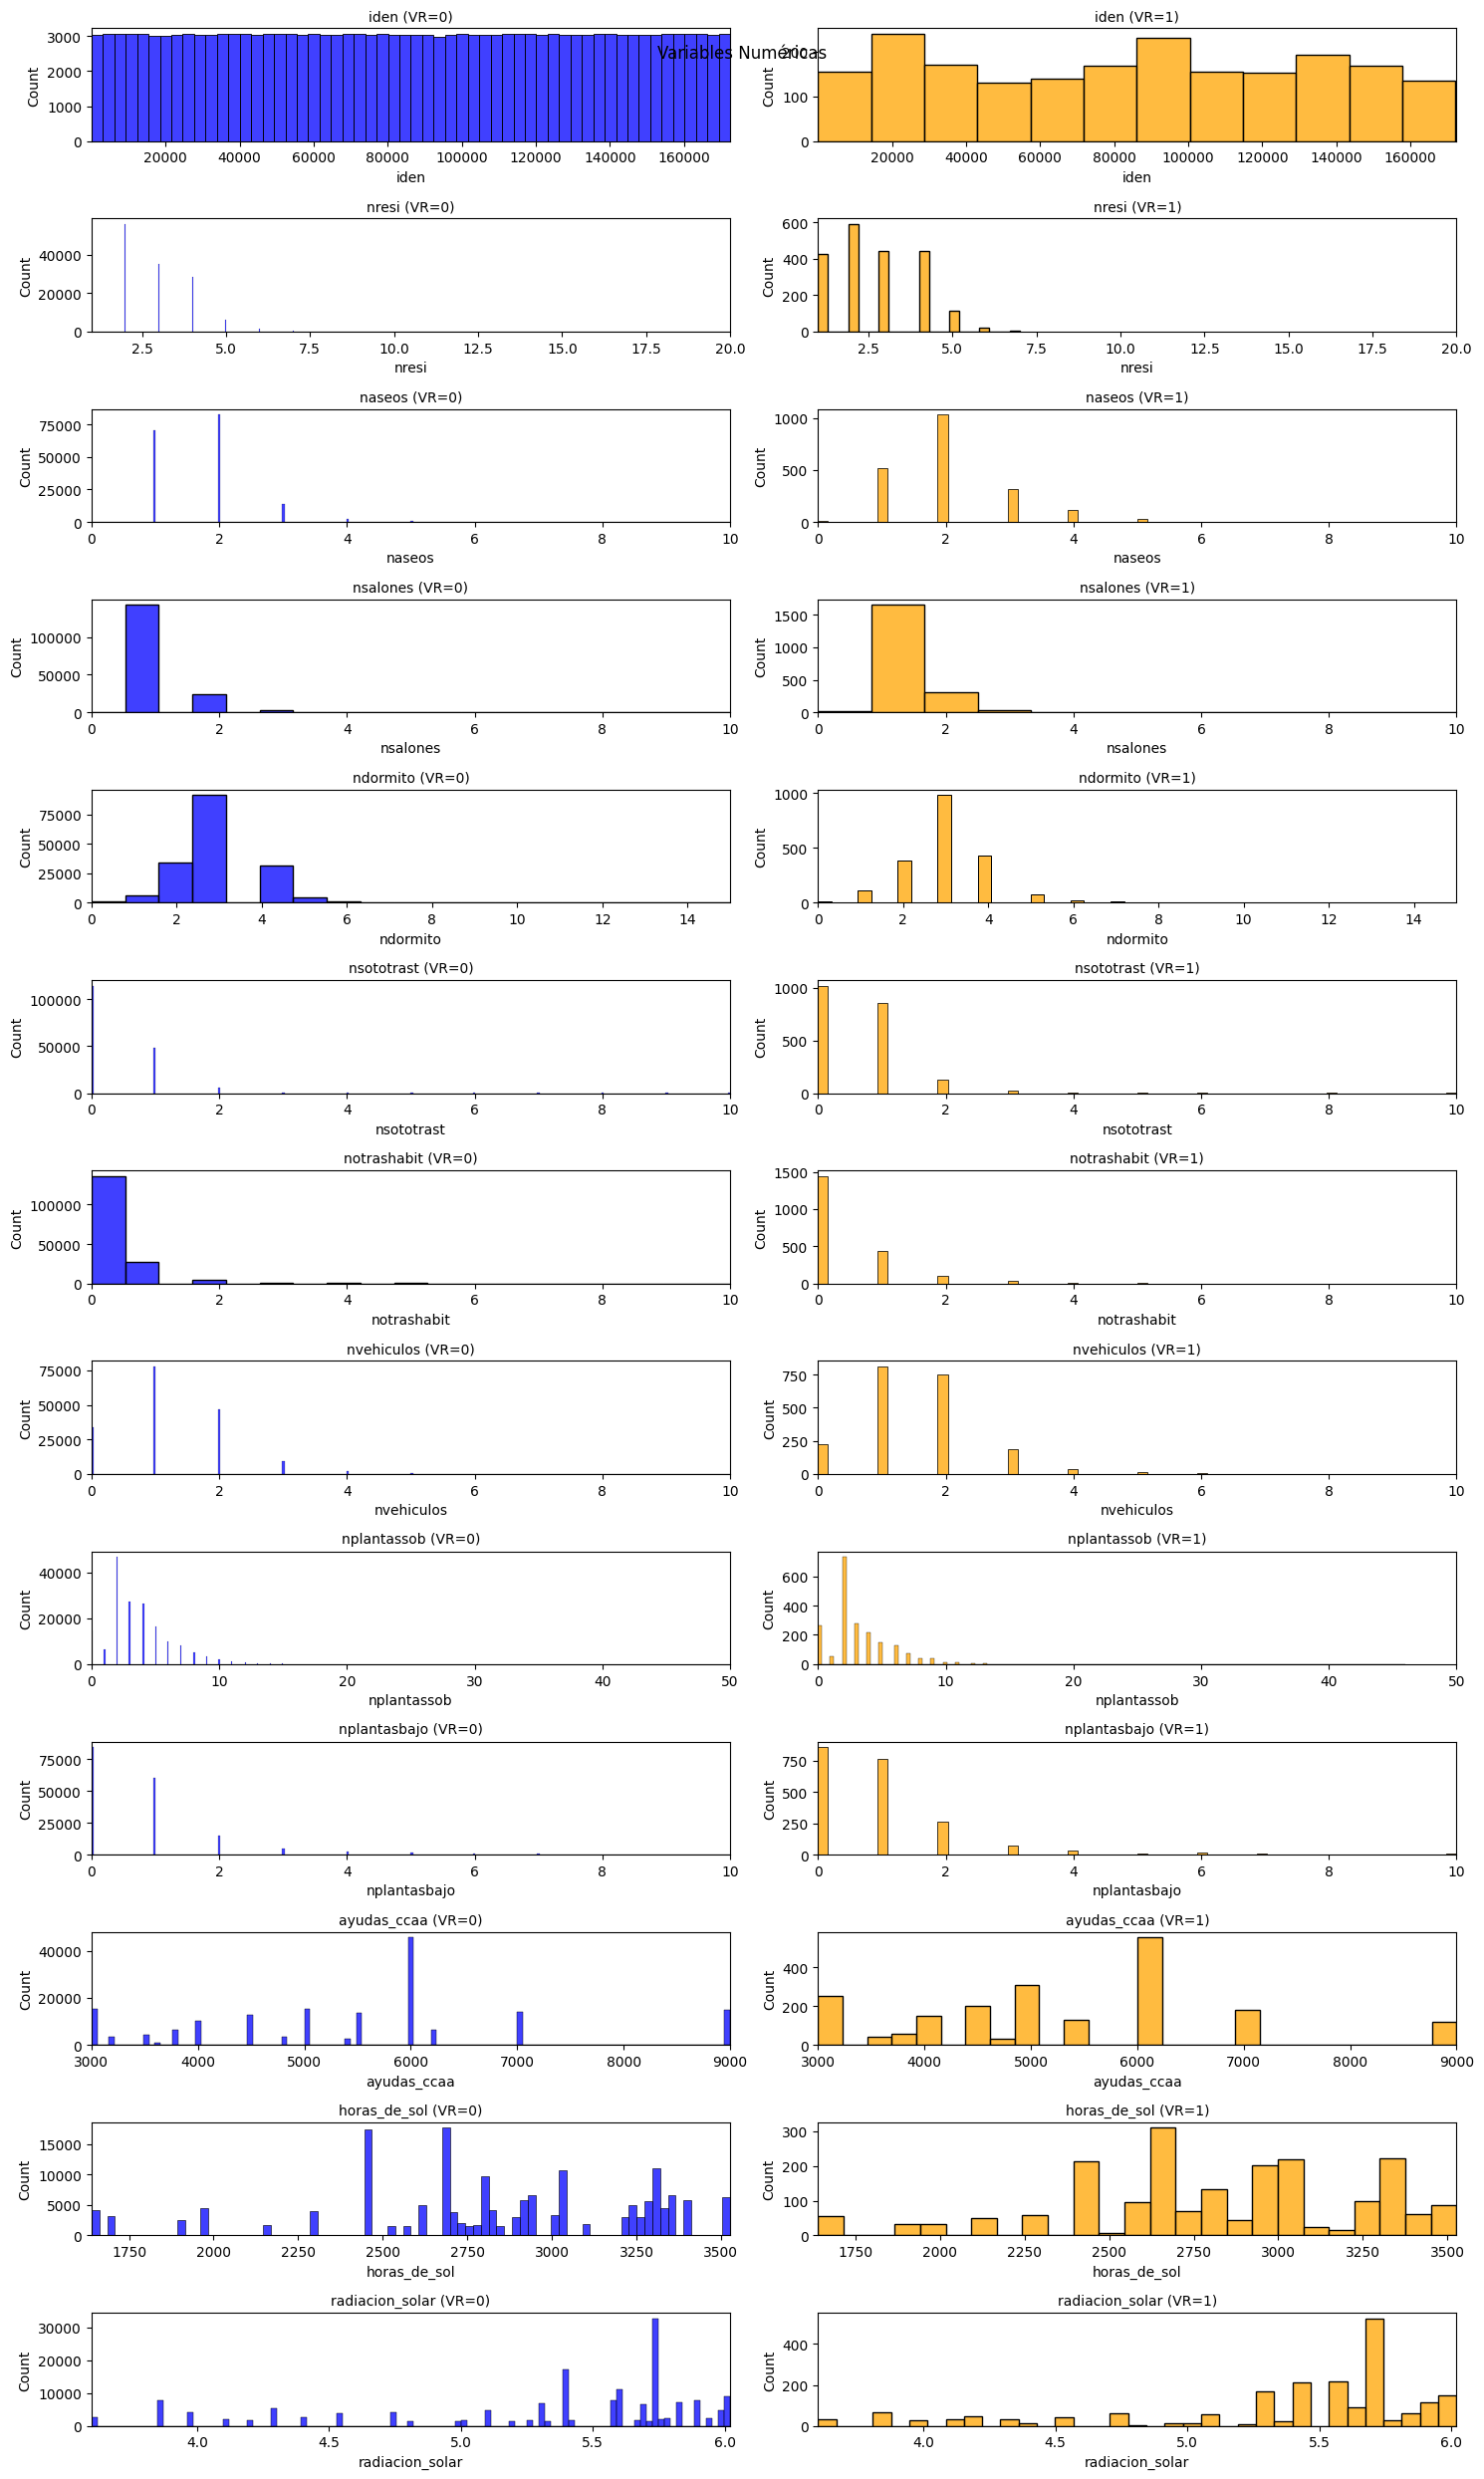

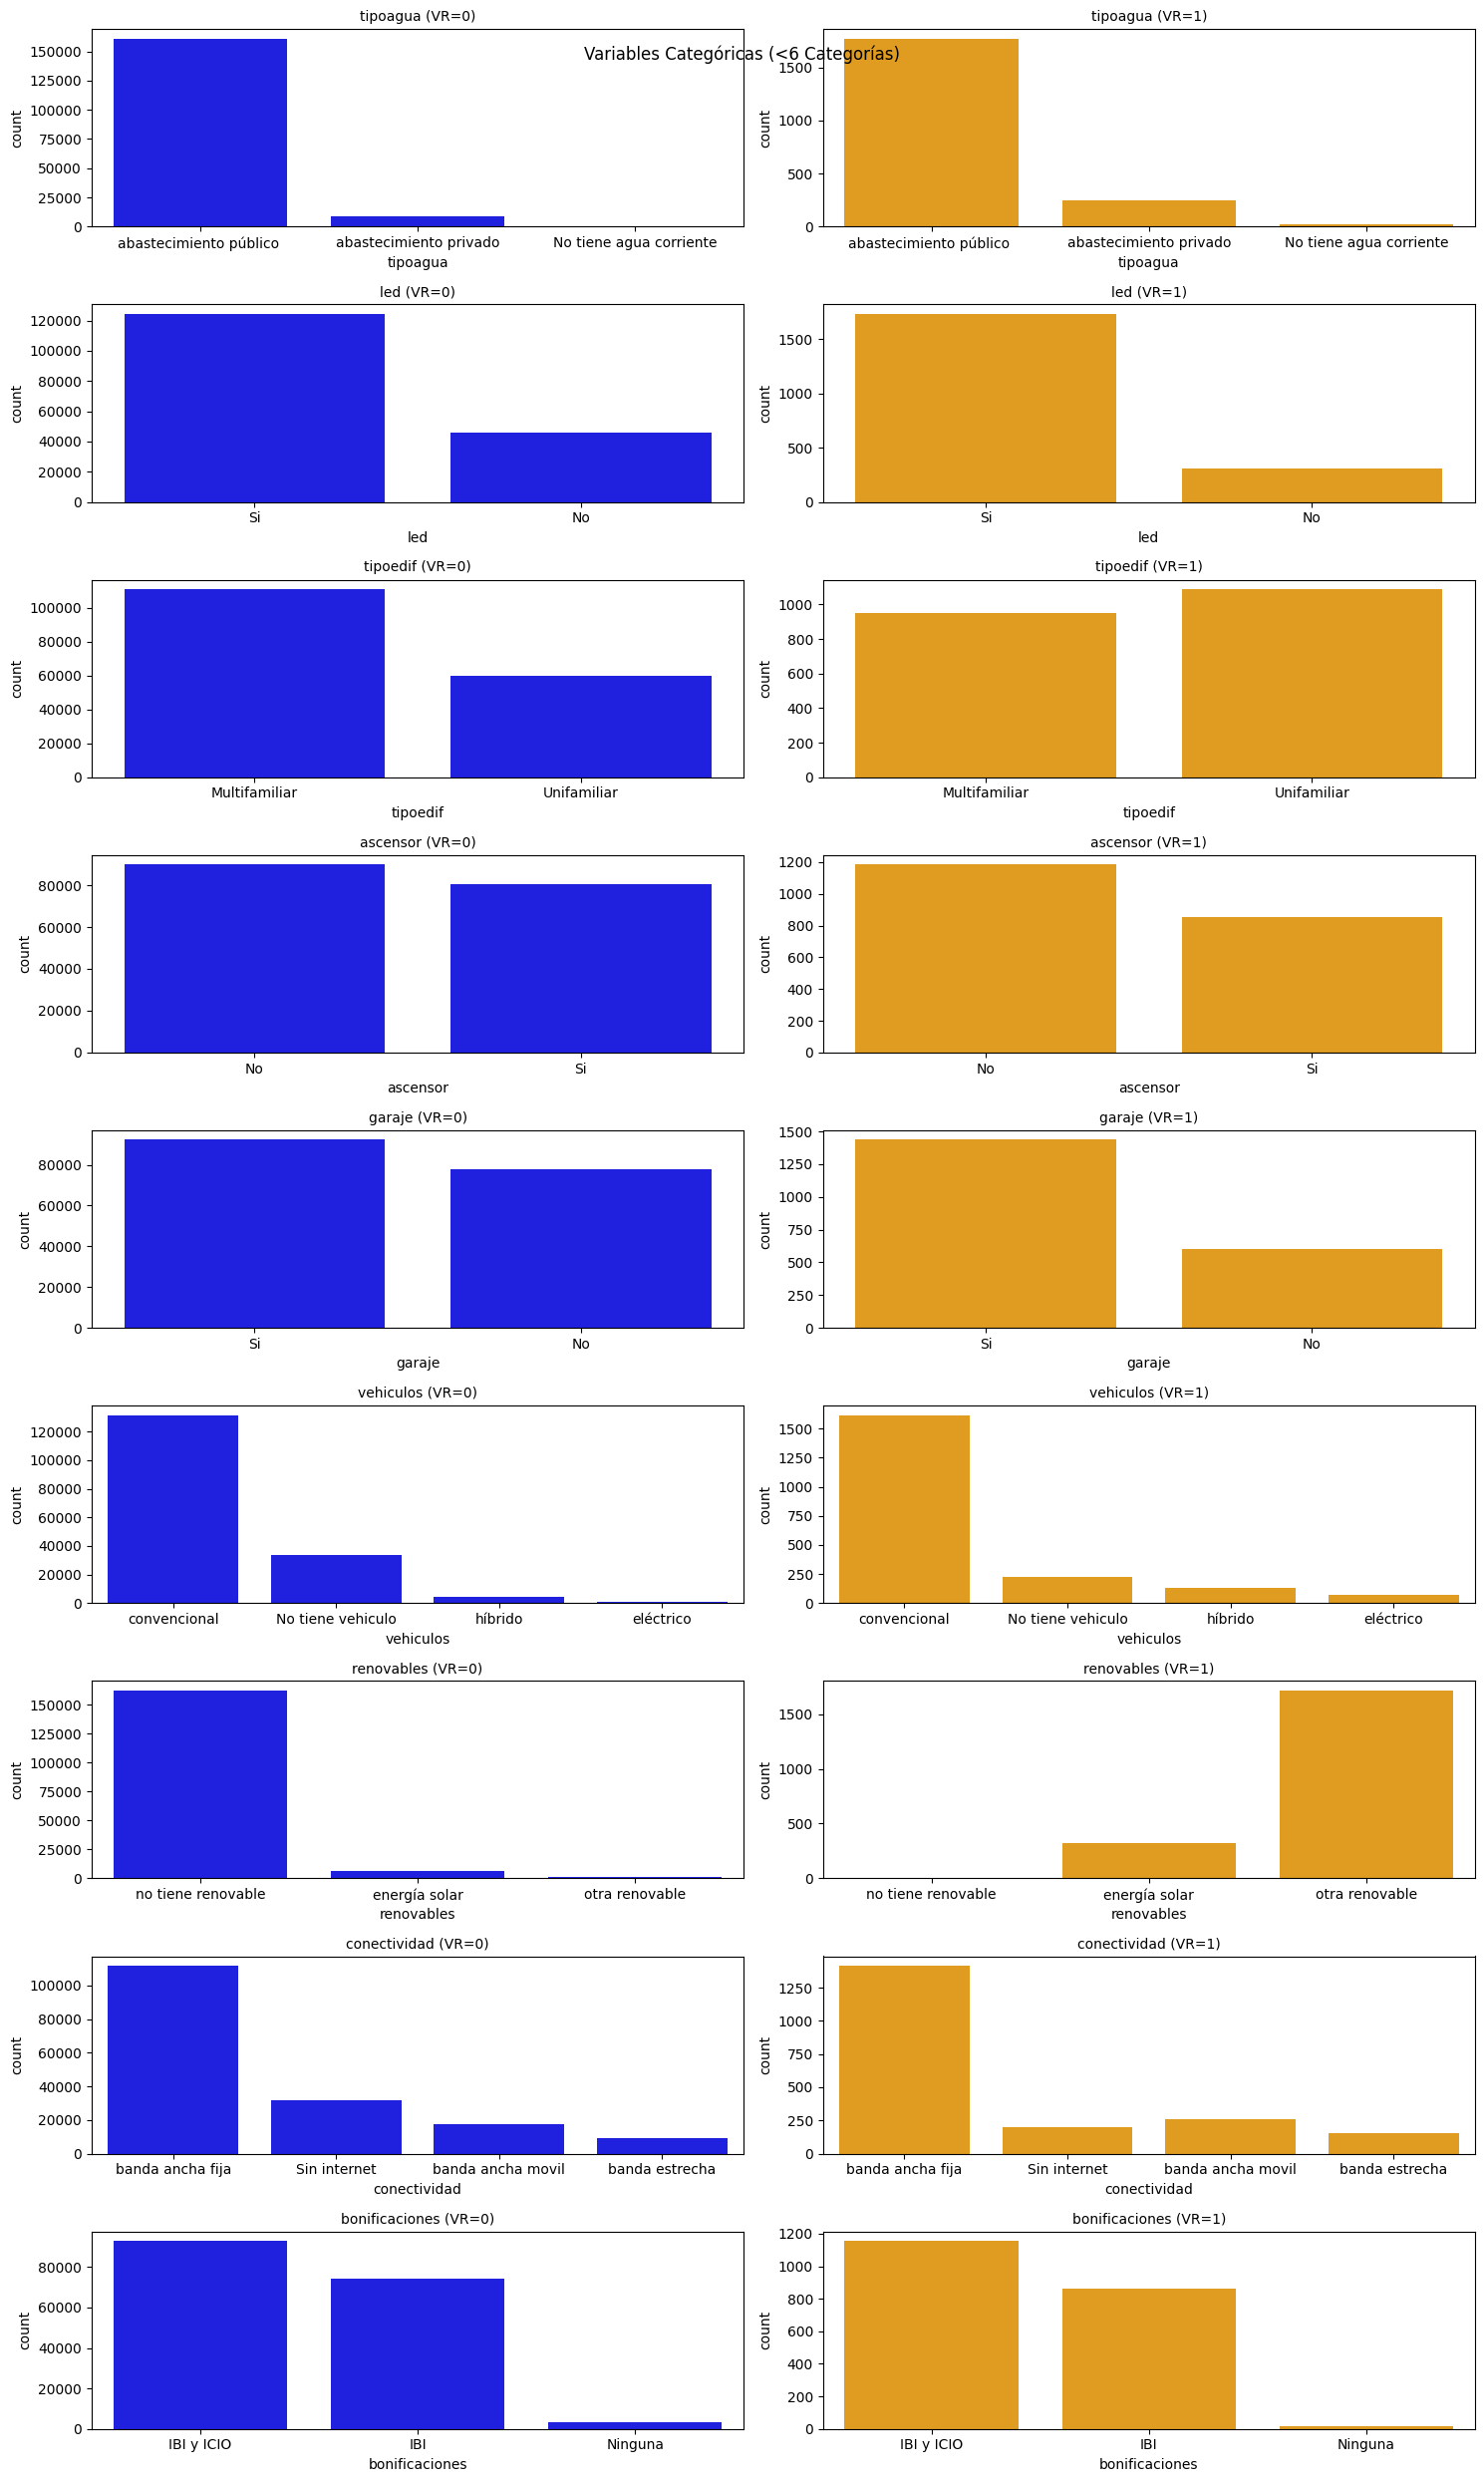

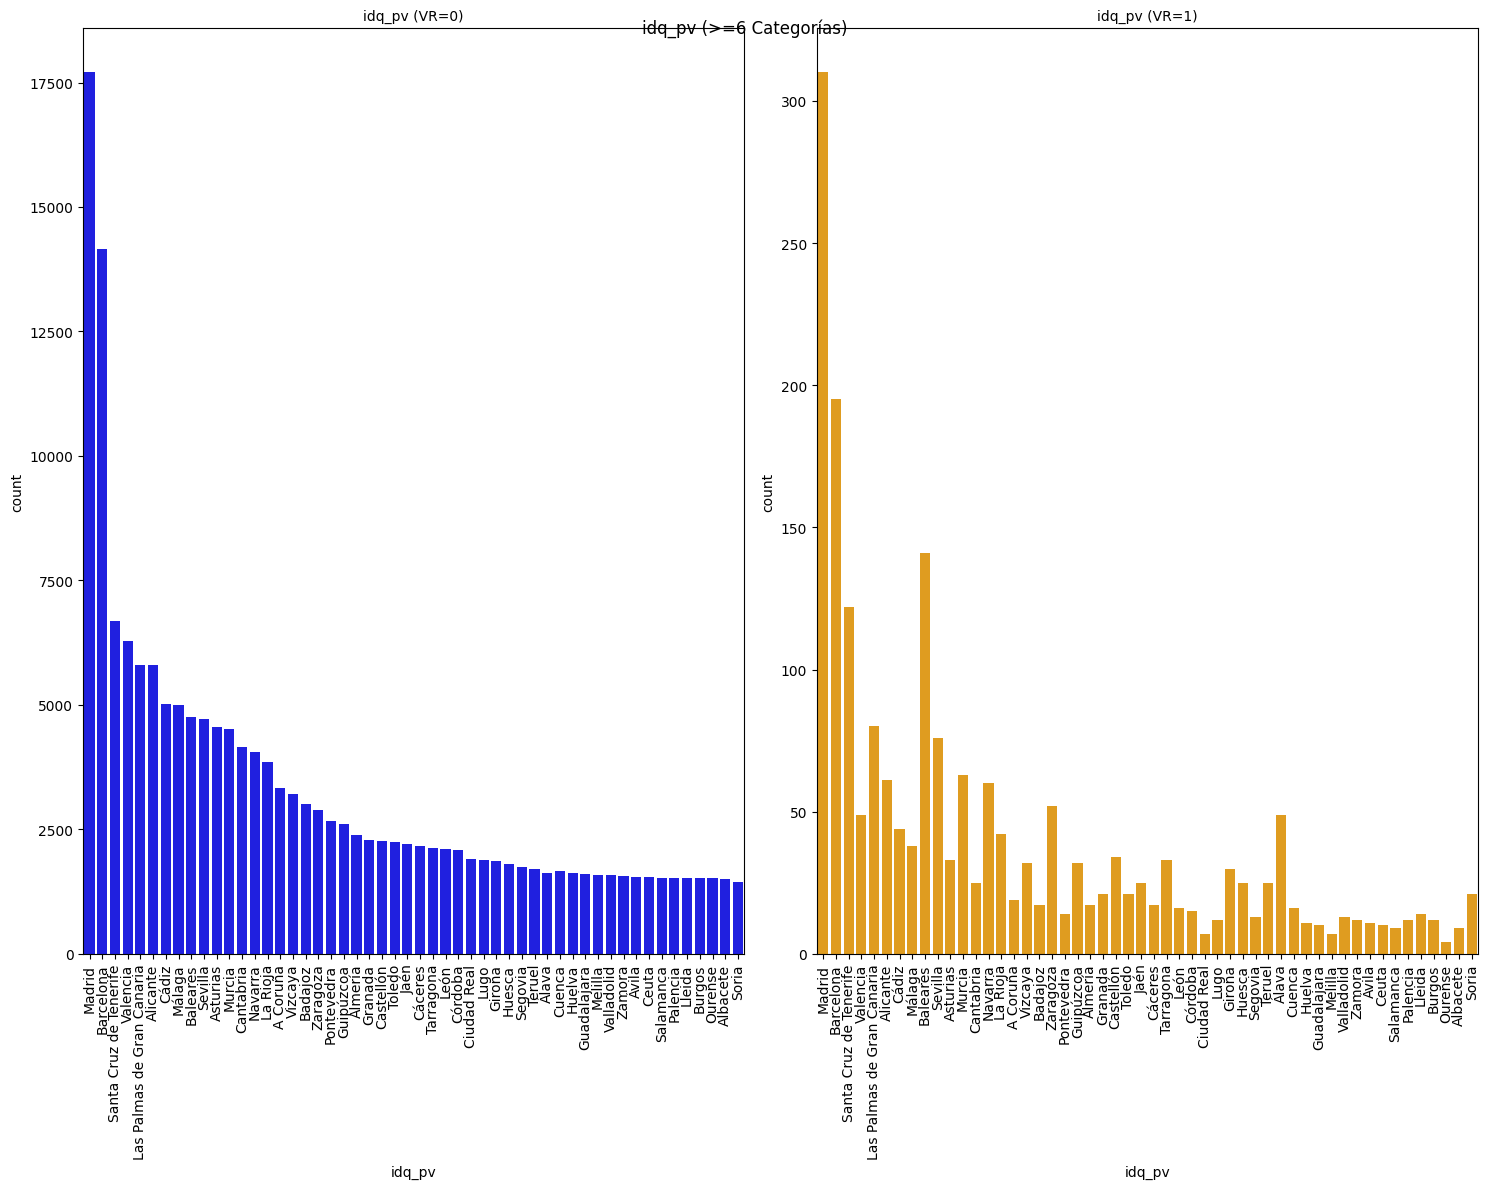

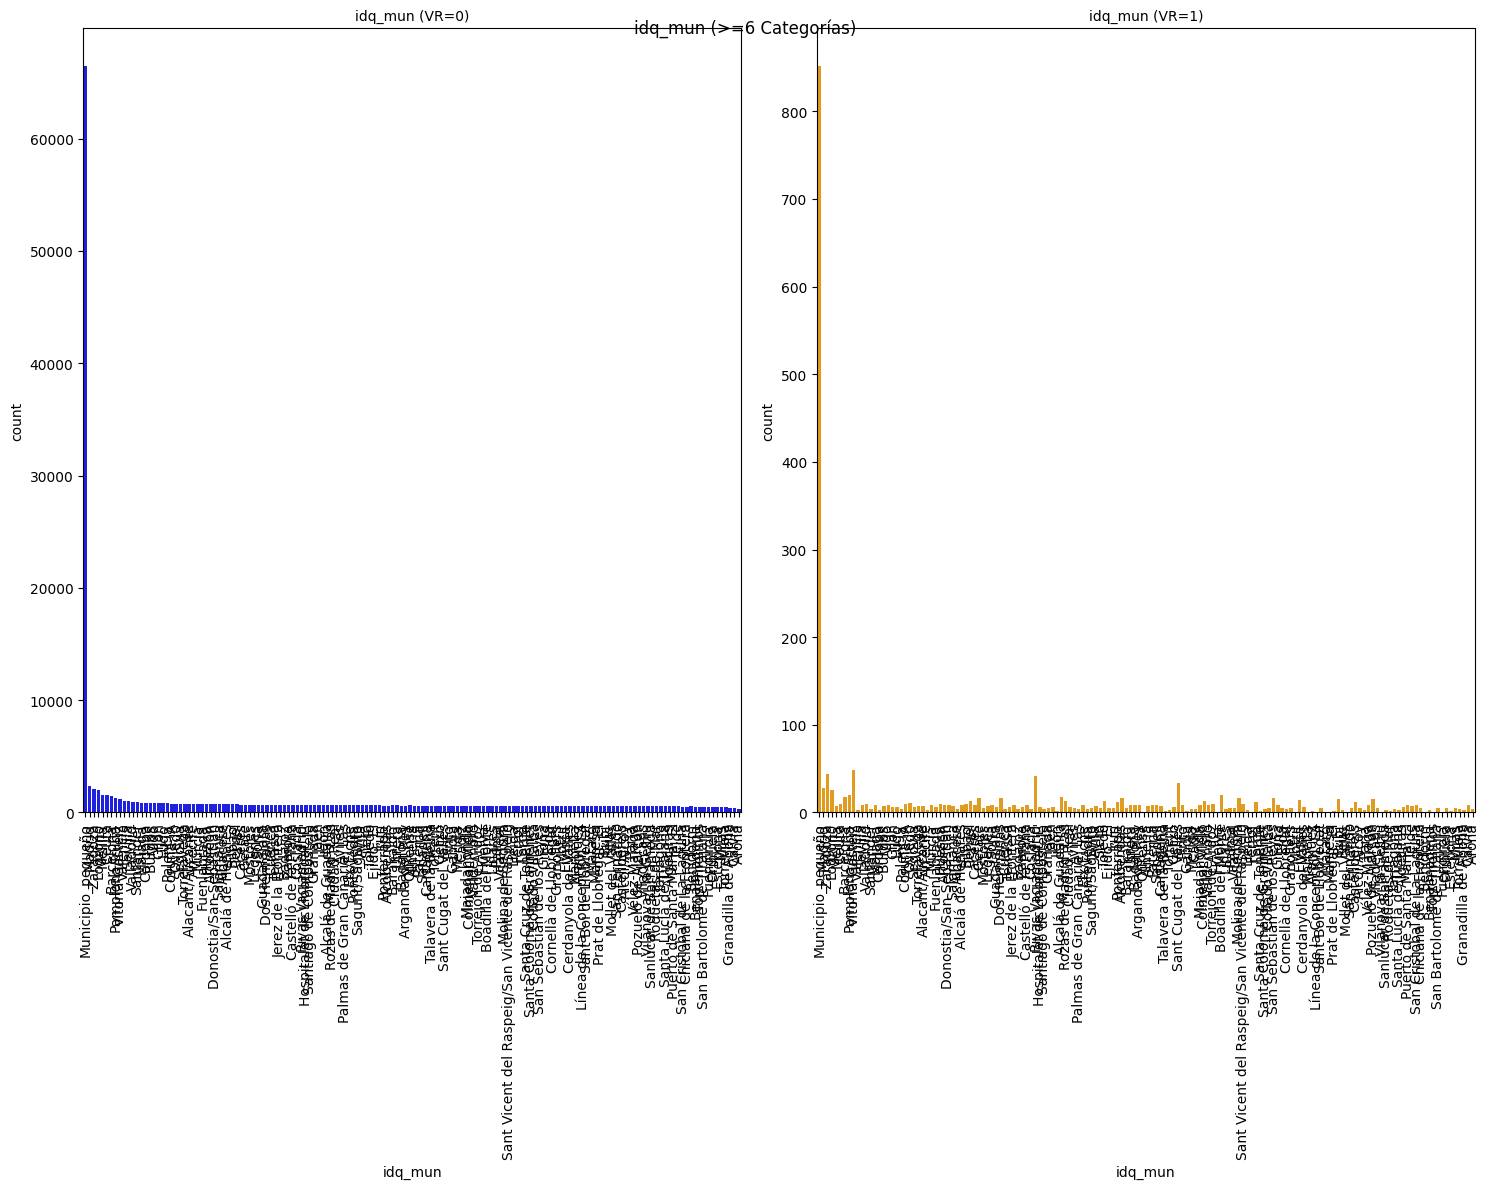

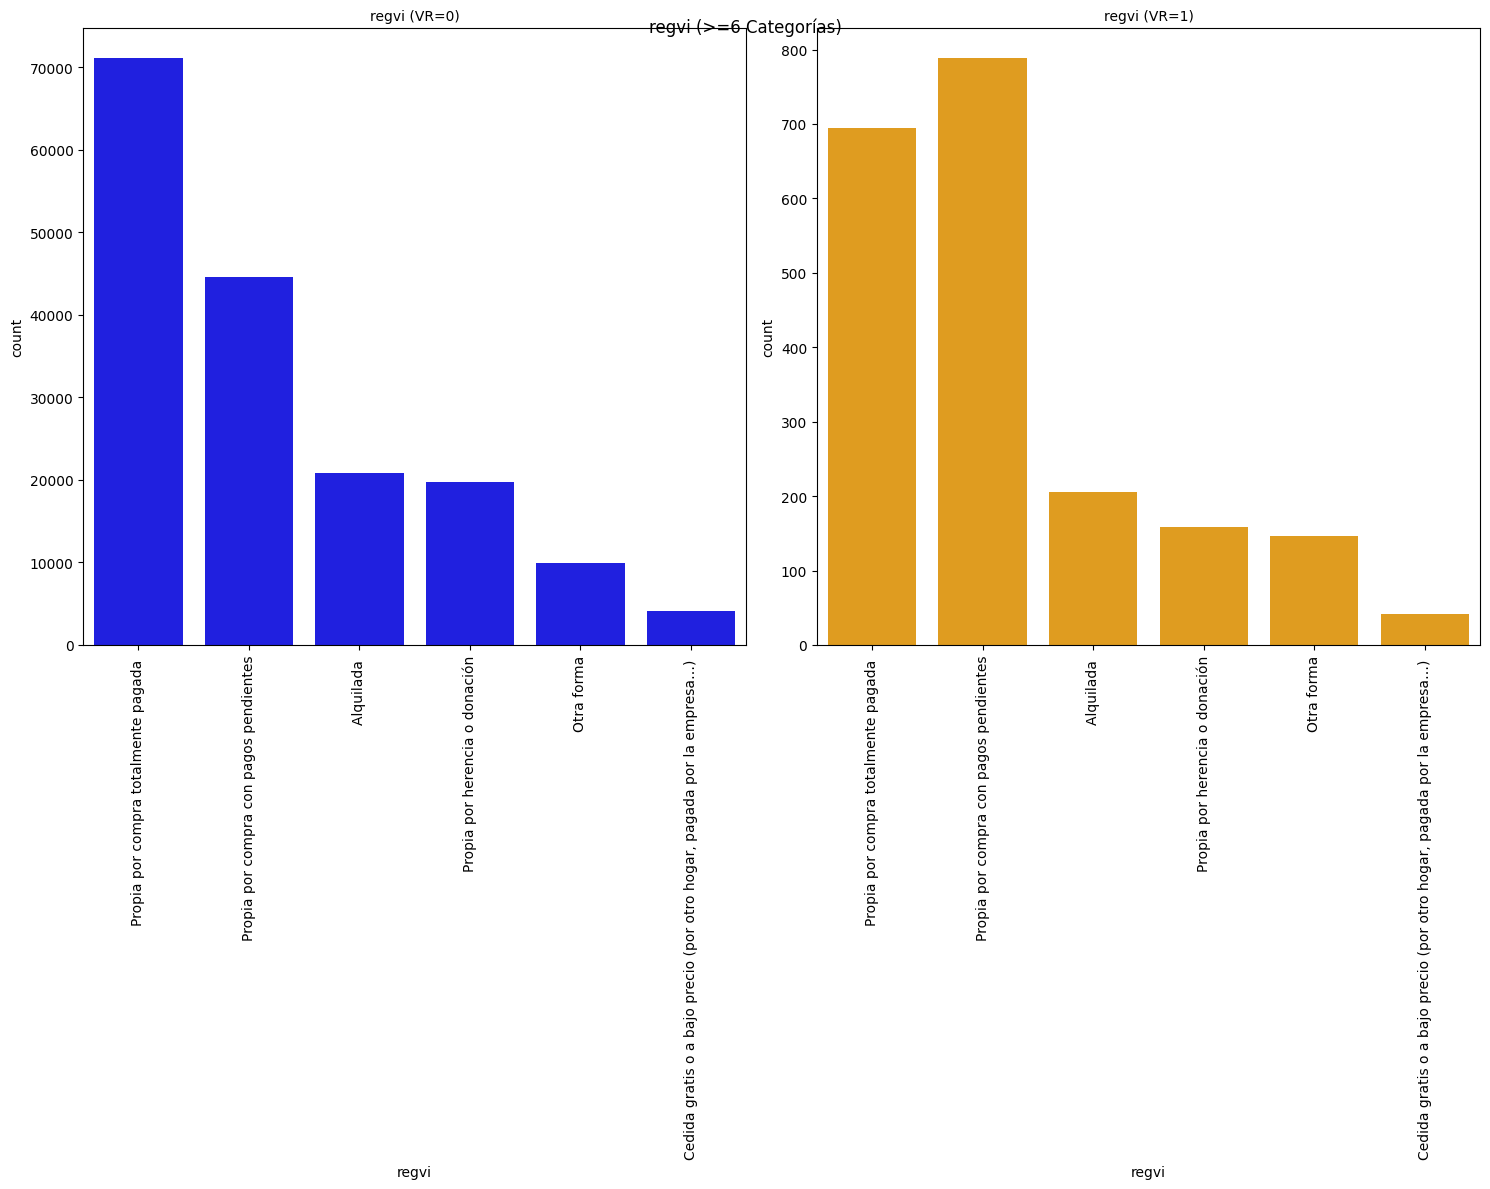

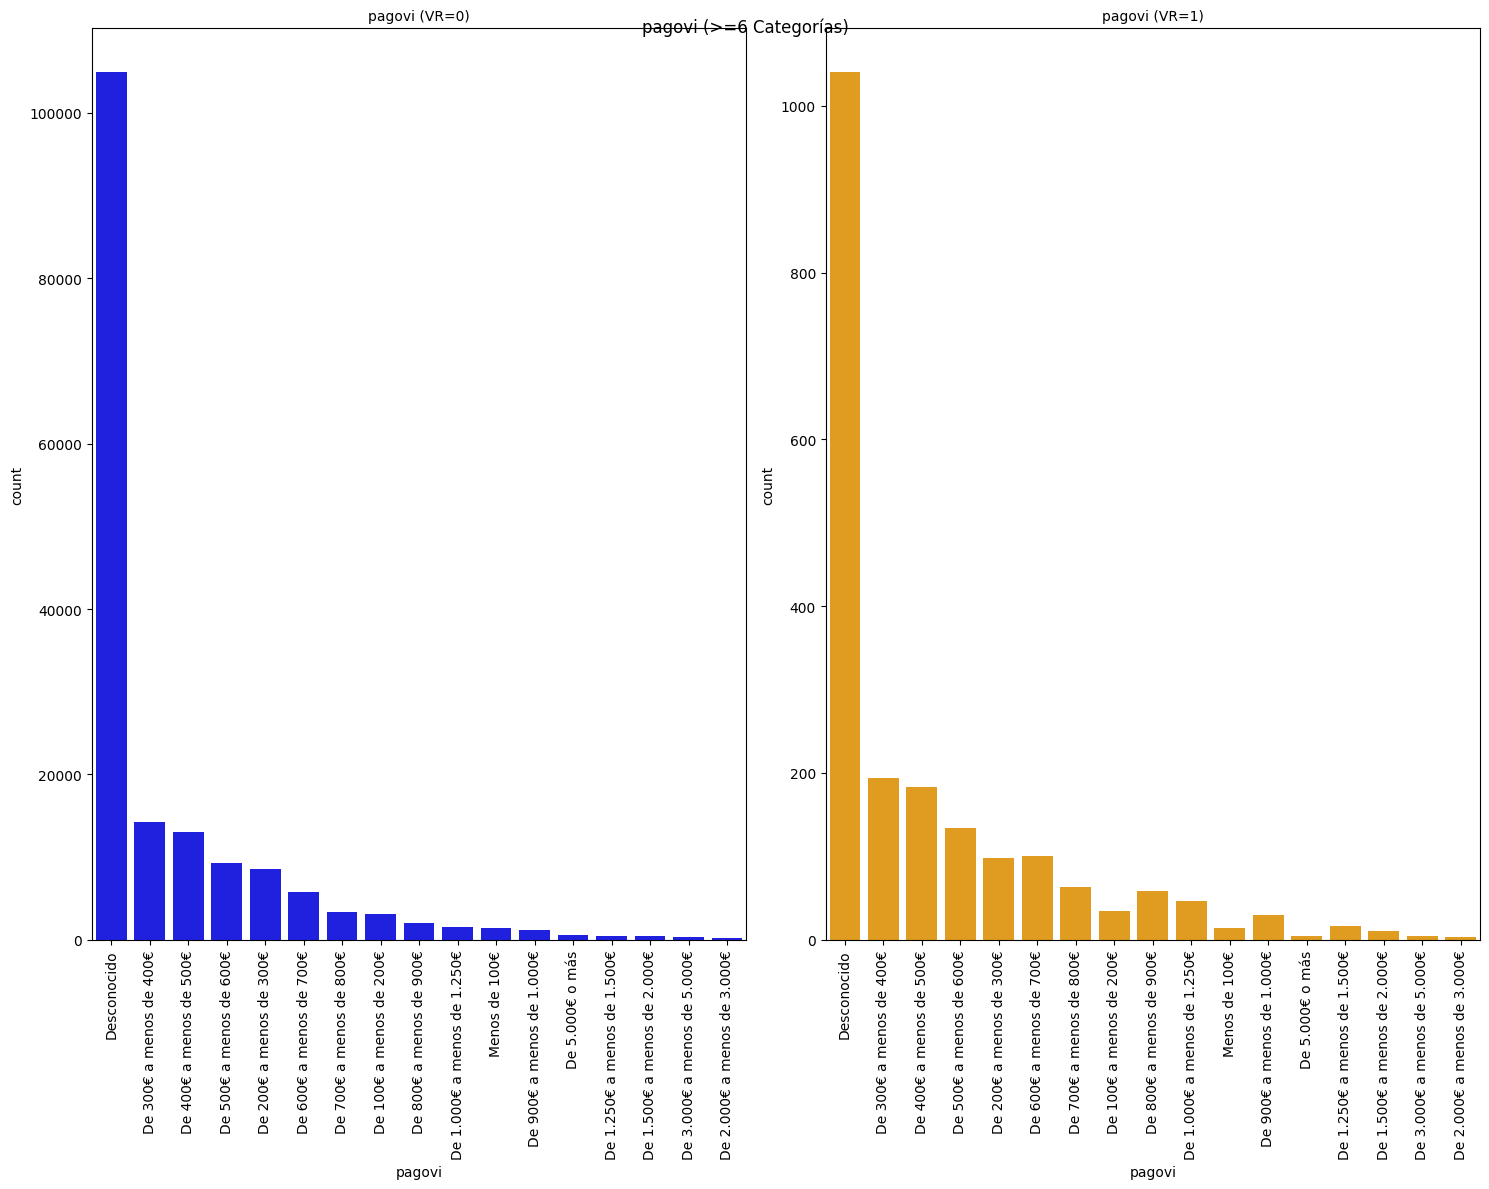

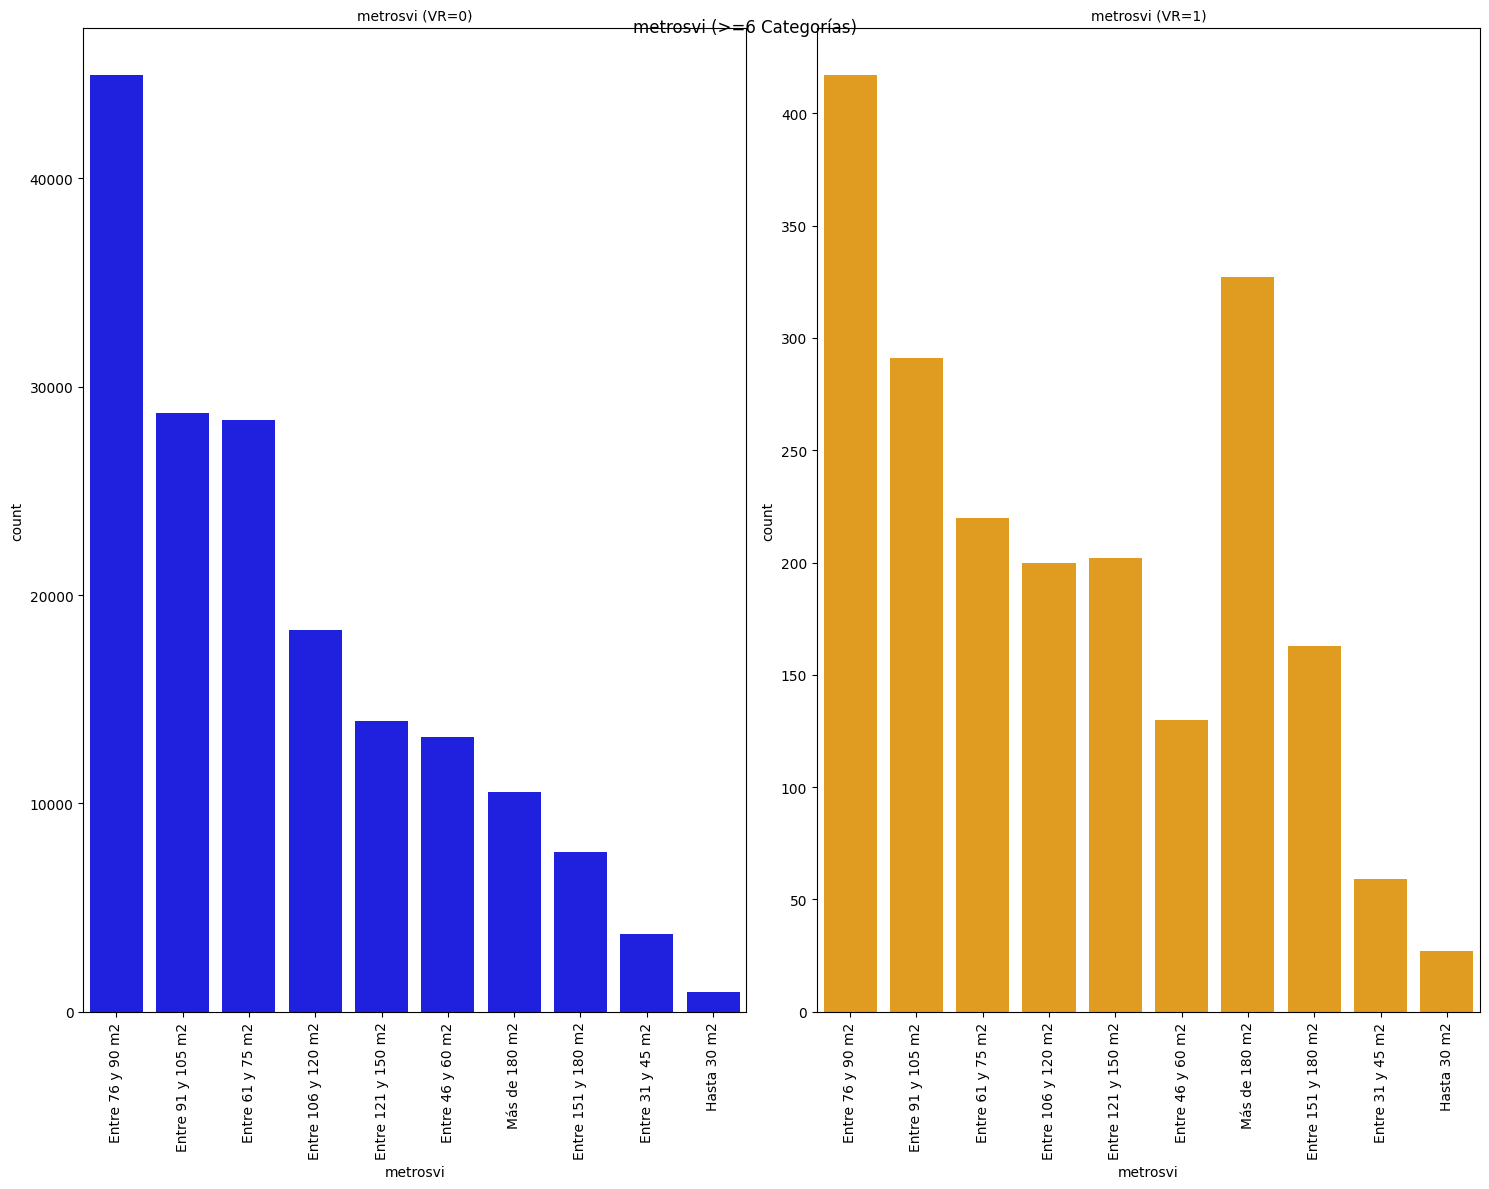

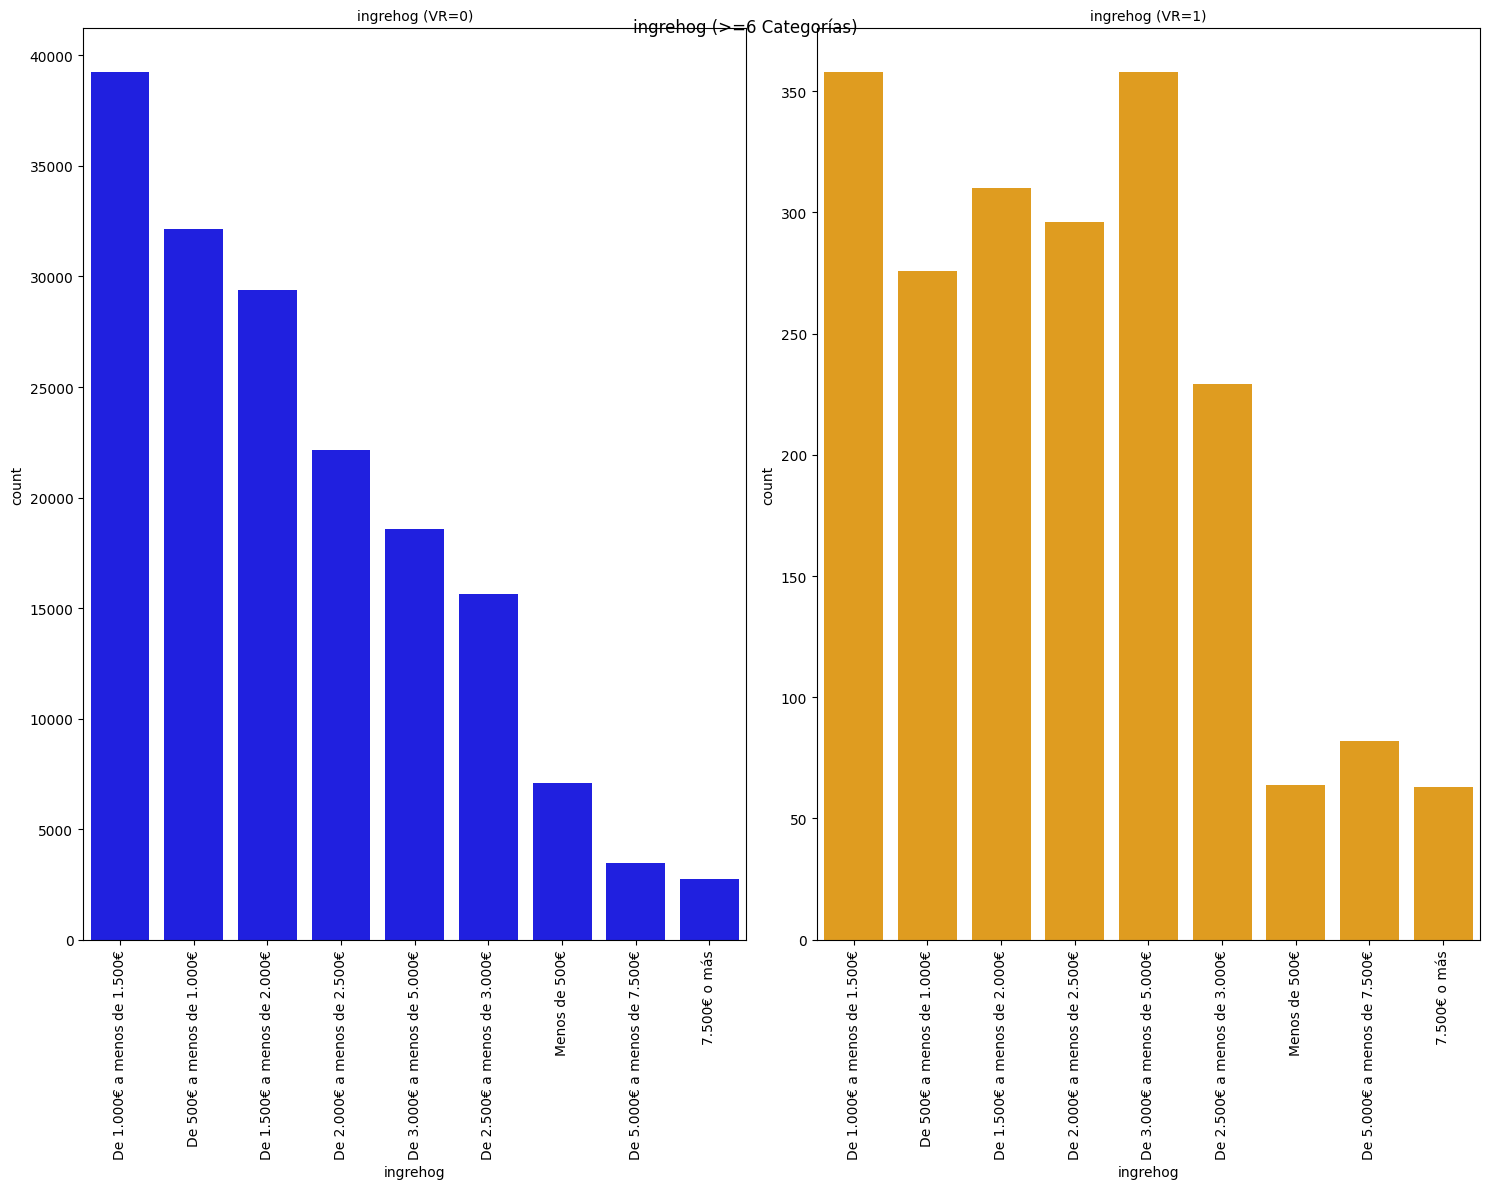

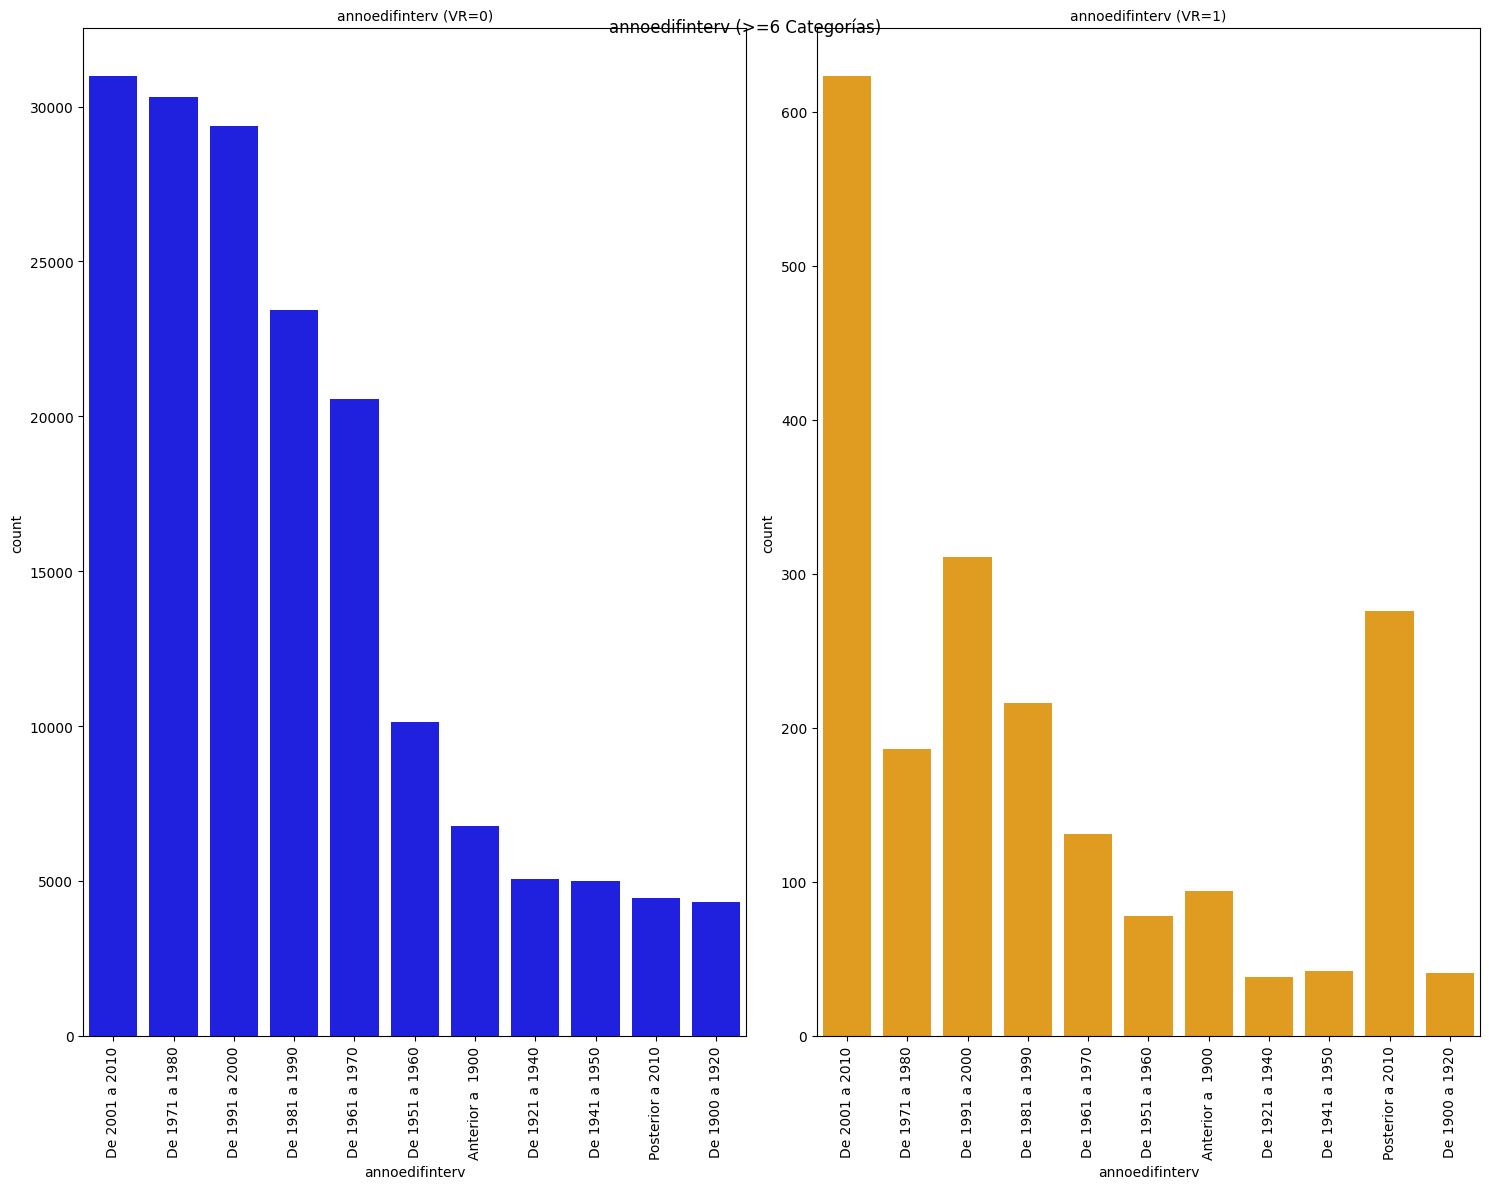

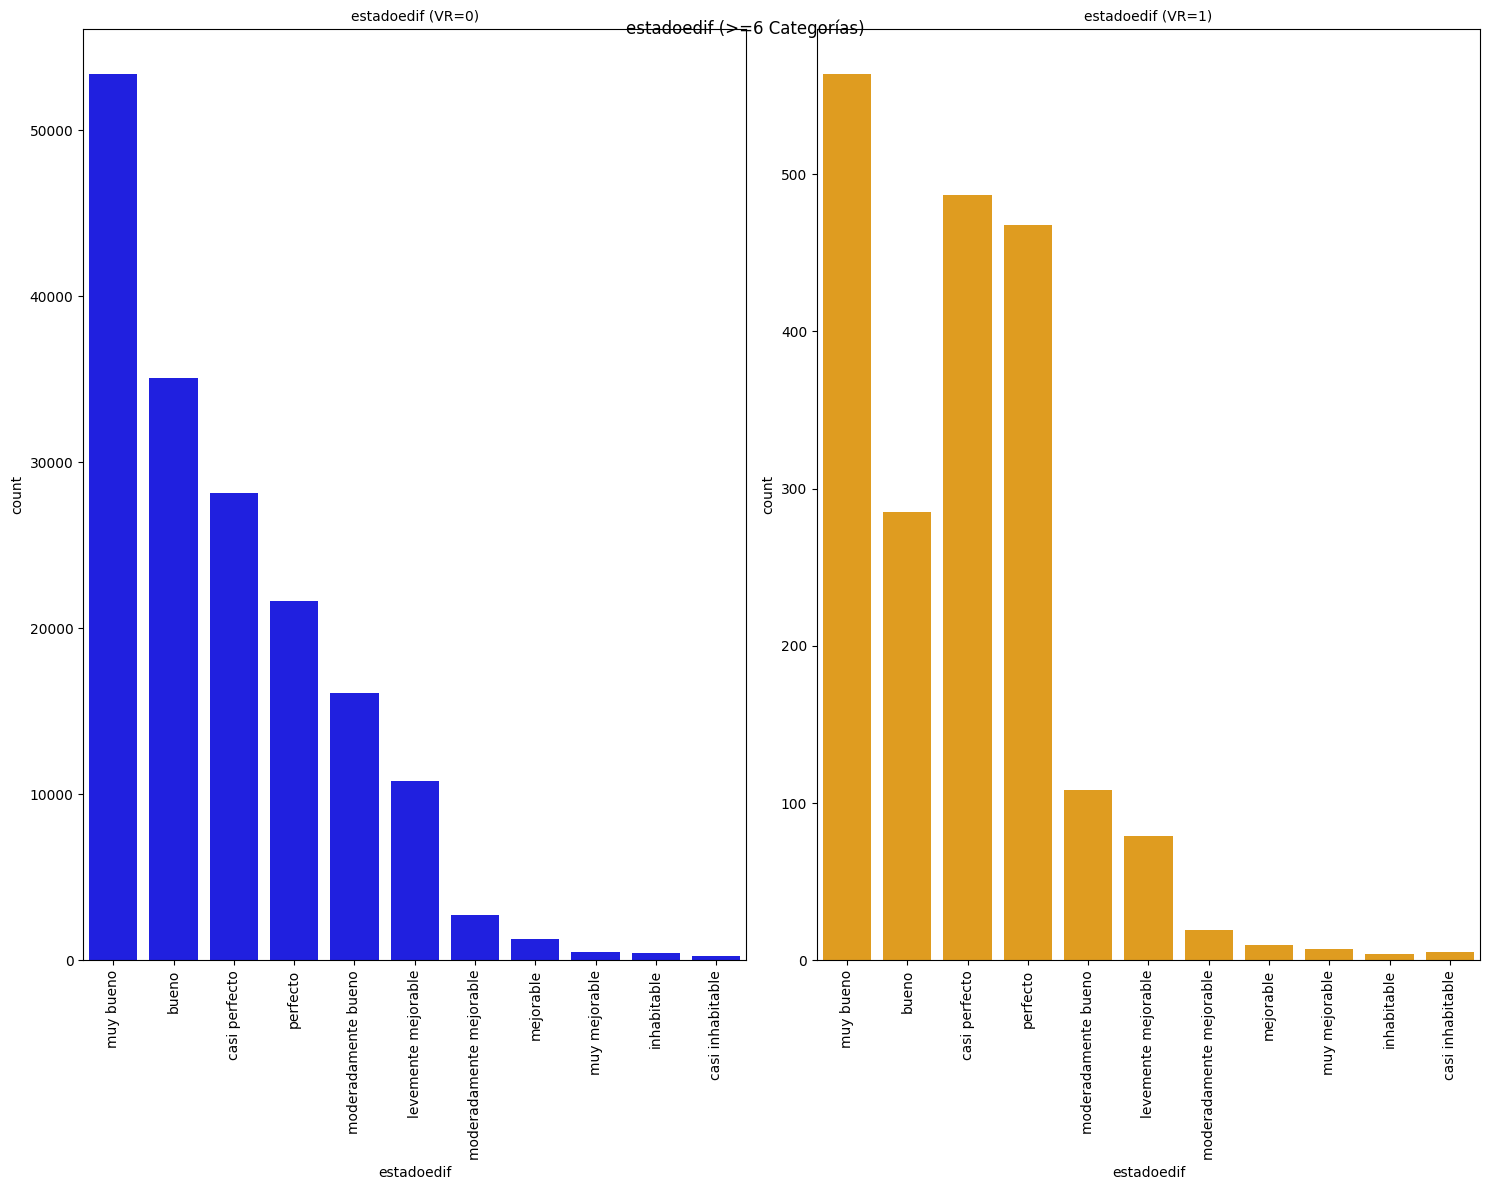

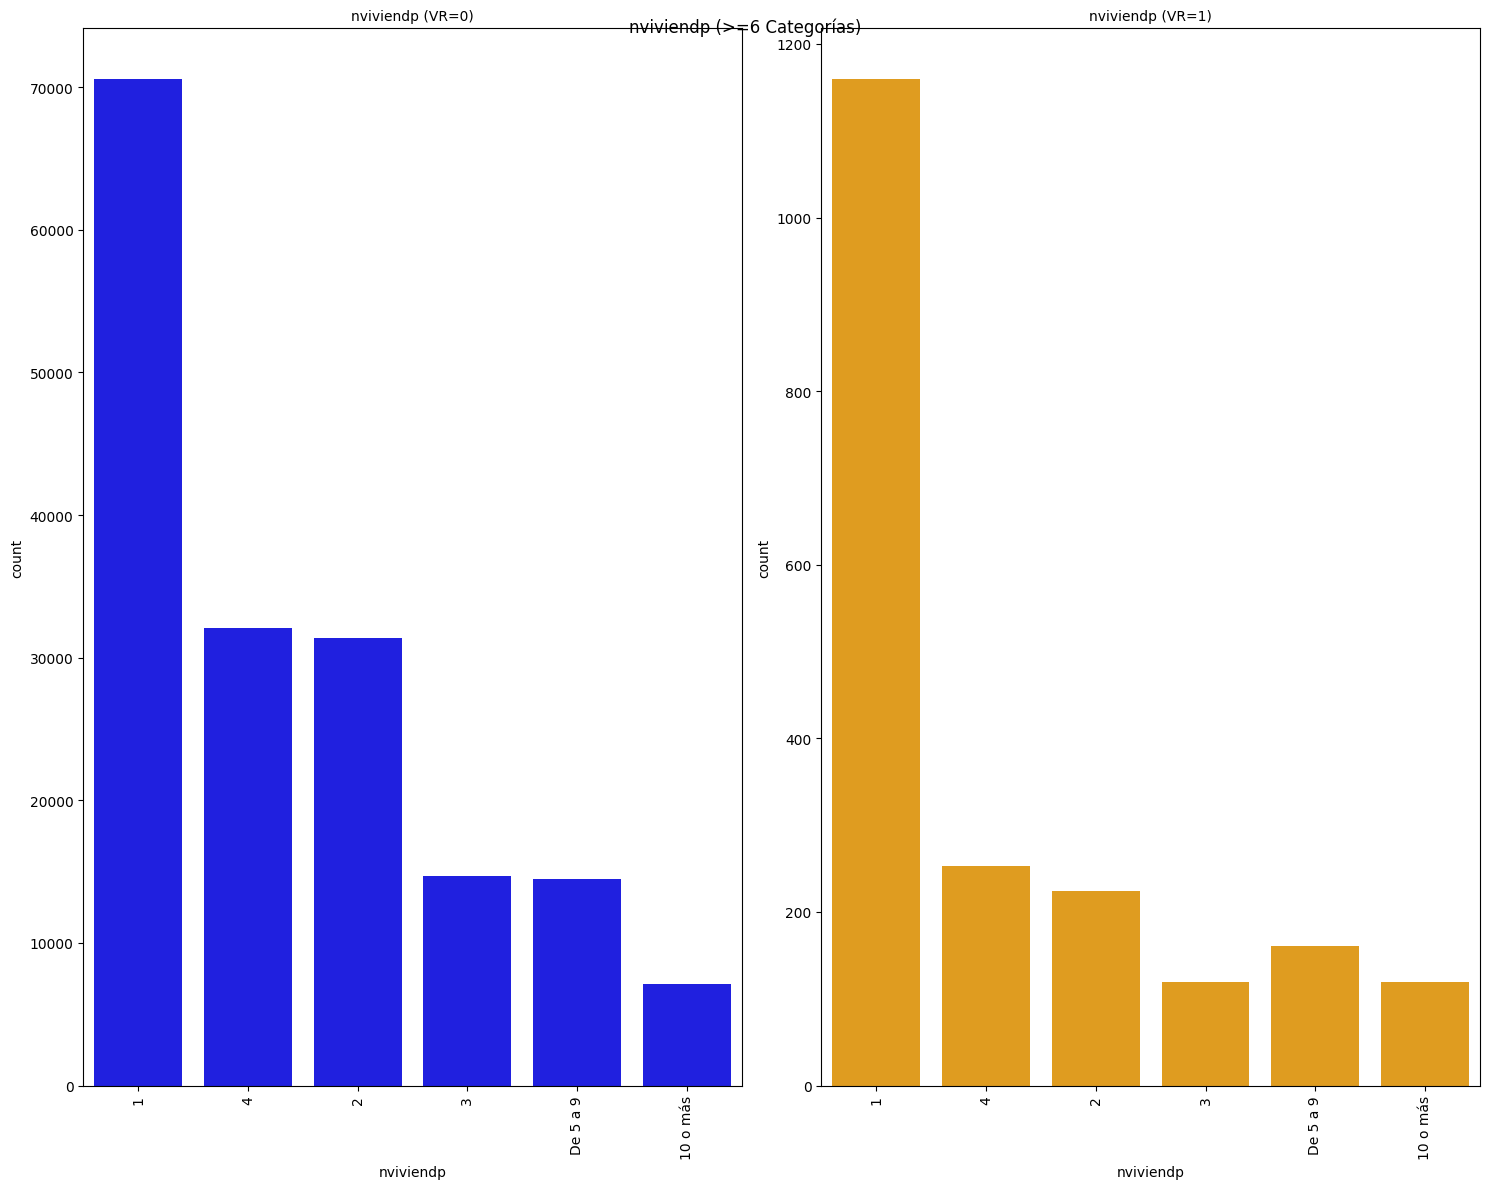

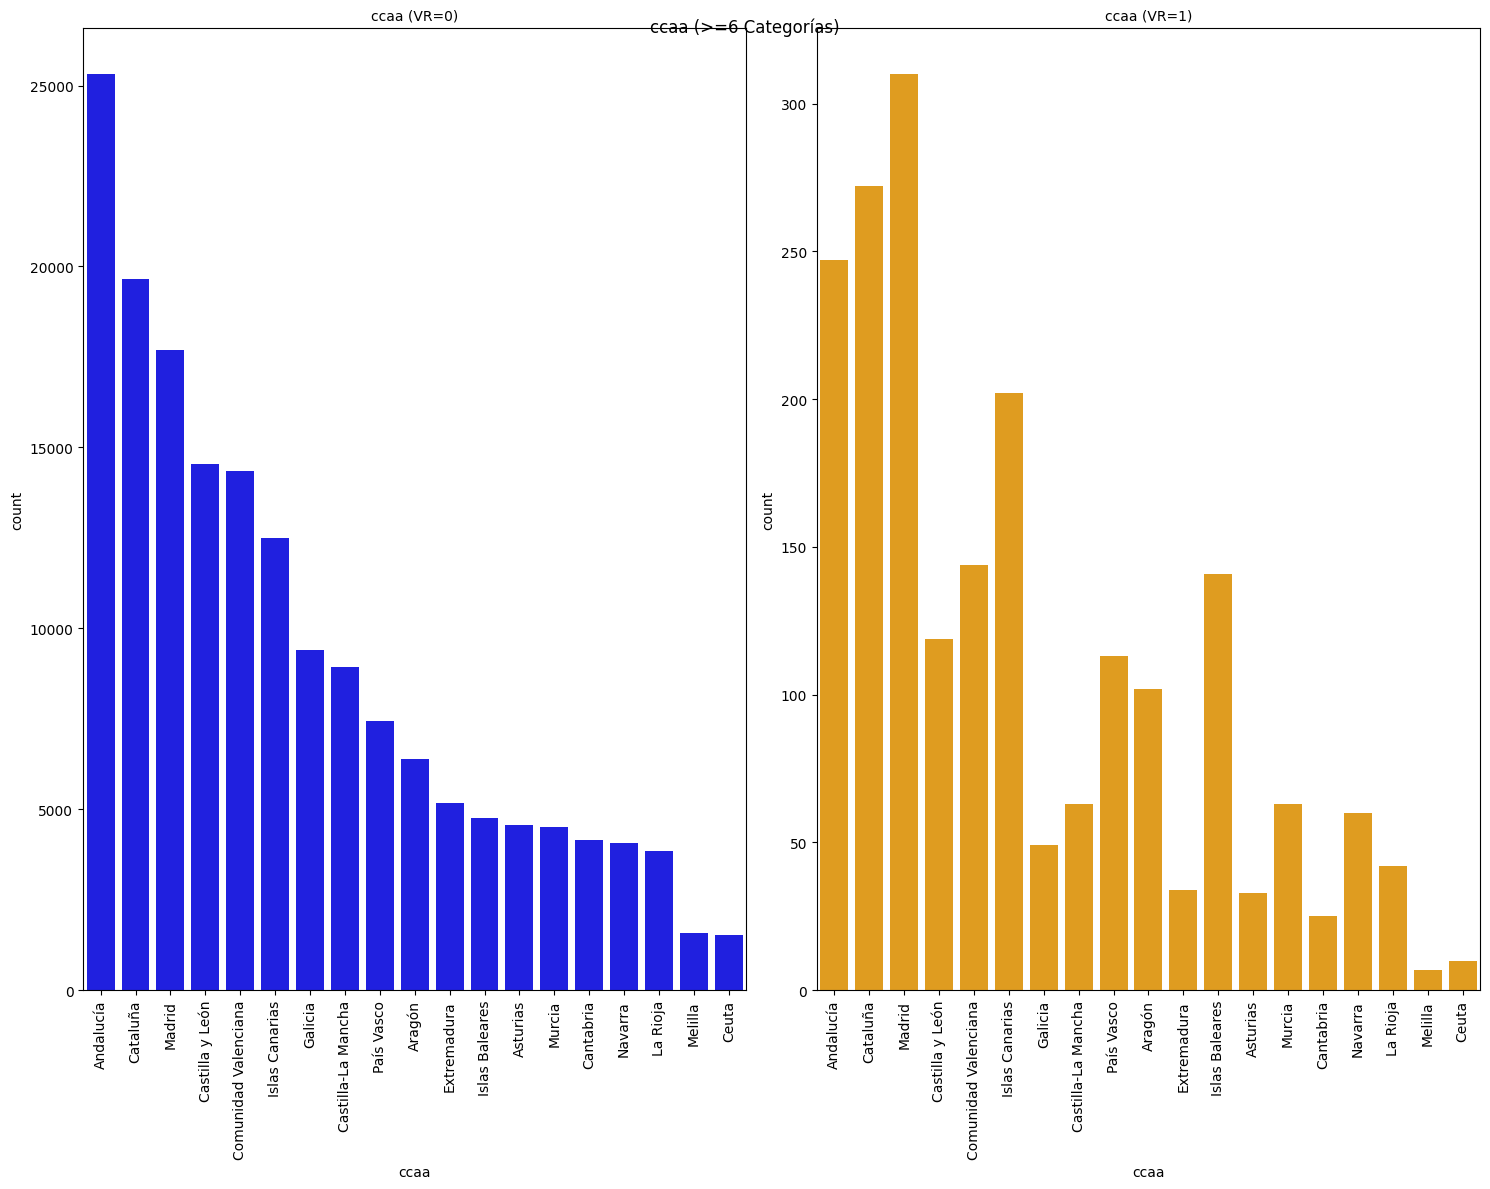

In [14]:
visualizador.plot_relacion_individual("erfotov", tamano_grafica=(15, 25), tamanio_fuente=10)

VEO LOS OUTLIERS (univariados)

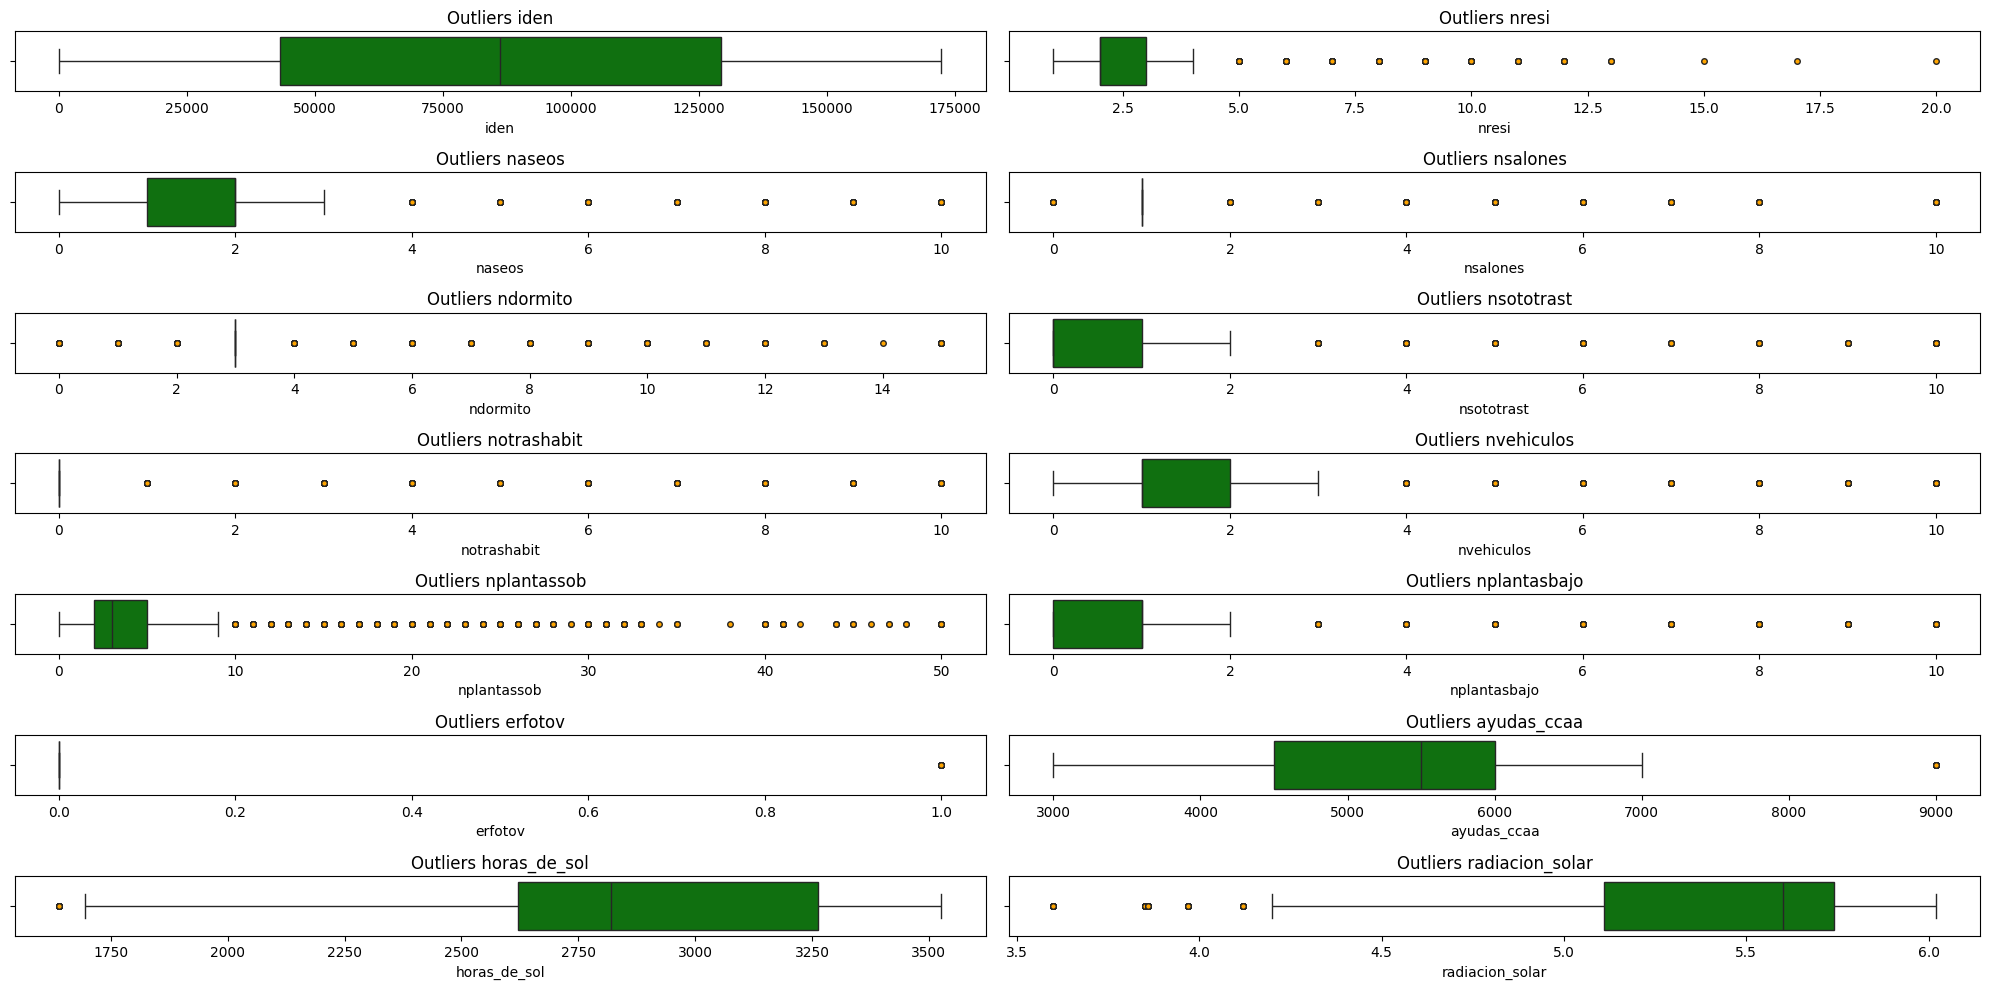

In [15]:
visualizador.deteccion_outliers(color="green")

VEO LAS CORRELACIONES

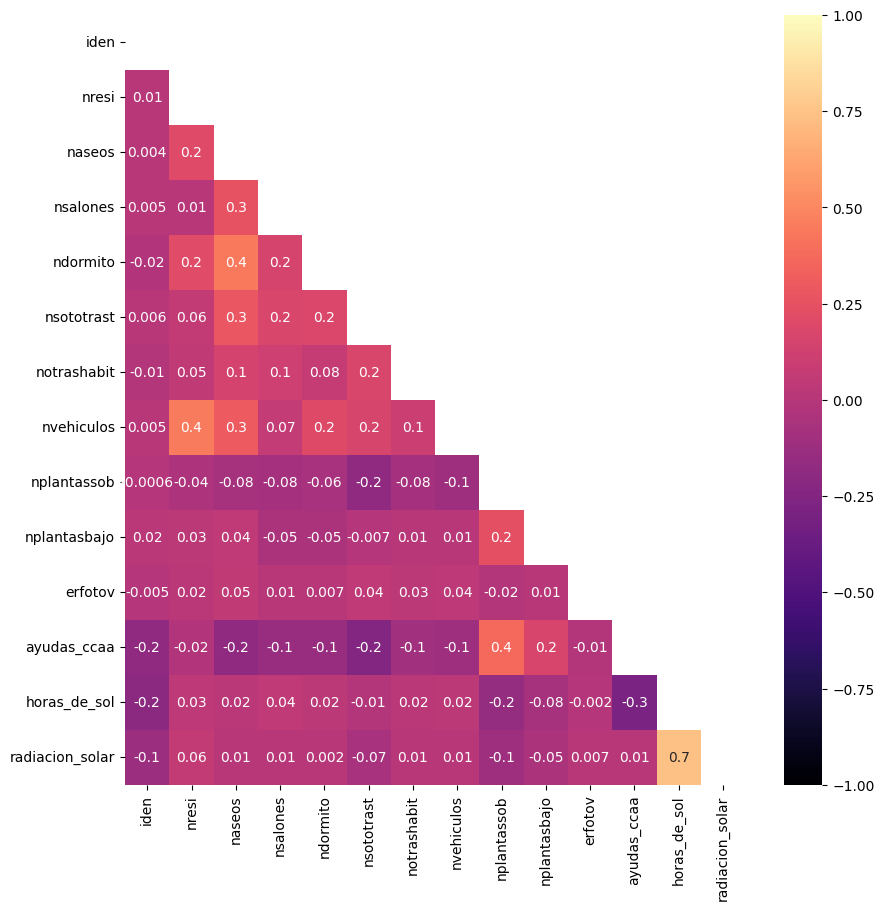

In [16]:
visualizador.correlacion(tamano_grafica=(10,10))

## FORMATEOS

In [17]:
df_filtrado.columns

Index(['iden', 'idq_pv', 'idq_mun', 'nresi', 'regvi', 'pagovi', 'tipoagua',
       'naseos', 'nsalones', 'ndormito', 'nsototrast', 'notrashabit',
       'metrosvi', 'nvehiculos', 'led', 'ingrehog', 'tipoedif', 'nplantassob',
       'nplantasbajo', 'annoedifinterv', 'estadoedif', 'ascensor', 'garaje',
       'erfotov', 'nviviendp', 'vehiculos', 'renovables', 'conectividad',
       'ccaa', 'ayudas_ccaa', 'bonificaciones', 'horas_de_sol',
       'radiacion_solar'],
      dtype='object')

In [18]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172444 entries, 0 to 172443
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iden             172444 non-null  int64  
 1   idq_pv           172444 non-null  object 
 2   idq_mun          172444 non-null  object 
 3   nresi            172444 non-null  int64  
 4   regvi            172444 non-null  object 
 5   pagovi           172444 non-null  object 
 6   tipoagua         172444 non-null  object 
 7   naseos           172444 non-null  int64  
 8   nsalones         172444 non-null  int64  
 9   ndormito         172444 non-null  int64  
 10  nsototrast       172444 non-null  int64  
 11  notrashabit      172444 non-null  int64  
 12  metrosvi         172444 non-null  object 
 13  nvehiculos       172444 non-null  int64  
 14  led              172444 non-null  object 
 15  ingrehog         172444 non-null  object 
 16  tipoedif         172444 non-null  obje

In [19]:
df_filtrado["nsototrast"]=df_filtrado["nsototrast"].astype("O")
df_filtrado["notrashabit"]=df_filtrado["notrashabit"].astype("O")
df_filtrado["nvehiculos"]=df_filtrado["nvehiculos"].astype("O")
df_filtrado["naseos"]=df_filtrado["naseos"].astype("O")
df_filtrado["nsalones"]=df_filtrado["nsalones"].astype("O")
df_filtrado["ndormito"]=df_filtrado["ndormito"].astype("O")
df_filtrado["nplantasbajo"]=df_filtrado["nplantasbajo"].astype("O")

In [20]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172444 entries, 0 to 172443
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iden             172444 non-null  int64  
 1   idq_pv           172444 non-null  object 
 2   idq_mun          172444 non-null  object 
 3   nresi            172444 non-null  int64  
 4   regvi            172444 non-null  object 
 5   pagovi           172444 non-null  object 
 6   tipoagua         172444 non-null  object 
 7   naseos           172444 non-null  object 
 8   nsalones         172444 non-null  object 
 9   ndormito         172444 non-null  object 
 10  nsototrast       172444 non-null  object 
 11  notrashabit      172444 non-null  object 
 12  metrosvi         172444 non-null  object 
 13  nvehiculos       172444 non-null  object 
 14  led              172444 non-null  object 
 15  ingrehog         172444 non-null  object 
 16  tipoedif         172444 non-null  obje

IMPORTANTE:  
Como vimos en el EDA inicial en la extracción de datos:  
  
- **idq_pv** y **iden**: Correlación positiva de **1**.  
- **tipoedif** y **tipoedifviv**: Correlación positiva de **1**.  
- **vehihibri** y **vehielectr**: Correlación positiva de **0.9**.    
- **vidrio/envases** y **papel**: Correlación positiva de **0.7**.  
- **envases** y **vidrio**: Correlación positiva de **0.7**.  
- **tipoedif/tipoedifviv** y **nviviendp**: Correlación positiva de **0.7**.   
  
Esto quiere decir que podríamos eliminar iden(no lo hago aún porque sigue siendo el identificaador único) y tipoedifviv puesto que explican lo mismo que idq_pv y tipoedif respectivamente. (Por ello las eliminamos)
En el caso de vehihibri y vehielectr como se juntaron en la misma columna ya se ha gestionado y de momento las correlaciones de 0.7 como tipoedif con nviviendp o horas_de_sol con radiacion_solar no las gestiono.  

# Siguientes pasos:  
  
- Conseguir los datos de las ayudas autonomicas/provinciales   DONE
- Conseguir los datos de la radiación solar/ horas de sol   DONE

#### EDA inicial (nulos, duplicados, datos erróneos) para conocer los datos
- No hay nulos  
- No hay duplicados  
- No parece haber datos erróneos  
  
**Formateos según las distribuciones (gráficamente):**  
  
- ntrasteros, notrashab, nvehiculos, naseos, nsalones, ndormitorios, anoent y nplantasbajo  DONE
    
#### Cargar todo a una base de datos (MONGO)  
- Crear la base de datos  DONE
- Cargar los datos  DONE
  
#### Hacer las Querys que necesite (filtrando)  
DONE  
  
#### Hacer EDA e identificar características exclusivas de las viviendas que tienen EF  
- Ditribuciones (cat y num)  DONE
- Relación con erfotov   
- Para poder decidir si el modelo se entrena solo con los que si que tienen EF (si no son exclusivas) o con ambas (si SI tiene características exclusivas(porque se las puede diferenciar))  
  
#### Empezar con el modelo  
  
#### Esto después del entrenamiento del modelo (2ºConjunto de datos)    
- Conseguir los datos de Red piso  DONE  

In [21]:
# vuelvo a pasar erfotov a SI o NO 
dicc={1:"Si",
      0:"No"}
df_filtrado["erfotov"]=df_filtrado["erfotov"].map(dicc)

In [22]:
df_filtrado["erfotov"].unique()

array(['No', 'Si'], dtype=object)

In [23]:
df_filtrado.to_pickle("../datos/EF/Datos_filtrados/Datos_filtrados.pkl")